# Case Studies in Statistical Thinking (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Case Studies in Statistical Thinking/"

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
import dc_stat_think as dcst  # DataCamp Statistical Thinking utility functions used in the Statistical Thinking courses.


##    CHAPTER 1  - Fish sleep and bacteria growth: A review of Statistical Thinking I and II


To begin, you'll use two data sets from Caltech researchers to rehash the key points of Statistical Thinking I and II to prepare you for the following case studies

#### Exercício 1 - Activity of zebrafish and melatonin

In [4]:
#vídeo

# Probability distribution: A mathematical description of outcomes
# A probability distribution has a story

# Distributions from Statistical Thinking I
#  - Uniform
#  - Binomial
#  - Poisson
#  - Normal
#  - Exponential

import dc_stat_think as dcst   # has the functions we previously built - ecdf, etc

# dcst.pearson_r?
# x, y = dcst.ecdf(nuclear_incident_times)  # example

##################

In [5]:
# in previous courses (I added this) - Statistical Thinking in Python 1 & 2

# ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Pearson correlation coefficient
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

###########

# Bernoulli trials
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""   
    n_success = 0
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1
    return n_success

# time for arrival of 2 successive Poisson processes
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of *2 successive Poisson processes*."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)
    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)
    return t1 + t2


####################

# Bootstrap replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# many Bootstrap replicates
def draw_bs_reps(data, func, size=1):    
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

####

# A function to do pairs bootstrap on a set of x,y data.
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Set up array of indices to sample from: **inds** <---------
    # **These are what you will resample and use them to pick values out of the x and y arrays.**
    inds = np.arange(len(x))
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    return bs_slope_reps, bs_intercept_reps

#####

# permutation sample from two data sets
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

# multiple permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

#####

# mean differences
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# fraction differences
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

In [6]:
# NEW functions

# formal ECDF
def ecdf_formal(x, data):
    return np.searchsorted(np.sort(data), x, side='right') / len(data)

# K-S statistic
def ks_stat(data1, data2):
    x, y = dcst.ecdf(data1)  # Compute the values of the convex corners of the formal ECDF for data1: x, y
    cdf = dcst.ecdf_formal(x, data2) # Compute the values of theoreticalCDF, determined from data2, at the convex corners x 
    D_top = y - cdf  # Compute distances between concave corners and CDF
    D_bottom = cdf - y + 1/len(data1) # Compute distance between convex corners and CDF
    return np.max((D_top, D_bottom))


# Draw K-S replicates 
def draw_ks_reps(n, f, args=(), size=10000, n_reps=10000):
    x_f = f(*args, size=size)  # Generate samples from target distribution
    reps = np.empty(n_reps) # Initialize K-S replicates
    for i in range(n_reps):  # Draw replicates
        x_samp = f(*args, size=n)  # Draw samples for comparison
        reps[i] = dcst.ks_stat(data1, data2)  # Compute K-S statistic
    return reps




Exercício 2

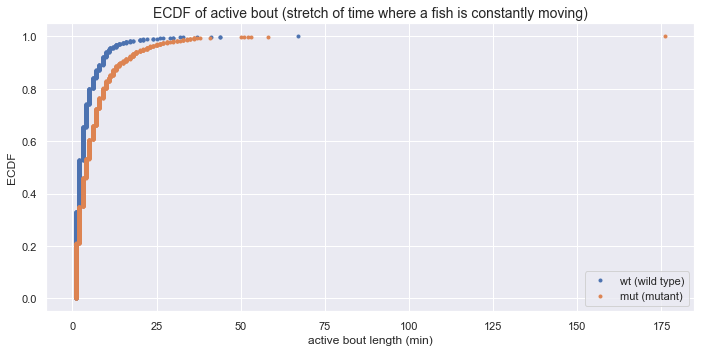

There is an outlier of one active bout for a mutant fish, and the ECDF exposes this clearly. 
It is important to know about, but we will not focus on it going forward, though.


,genotype,bout_length,fish
0,het,12.00,1
1,het,33.00,1
2,het,0.96,1
3,het,4.98,1
4,het,1.98,1


In [7]:
# EDA: Plot ECDFs of active bout length

# An active bout is a stretch of time where a fish is constantly moving. 
# Plot an ECDF of active bout length for the mutant and wild type fish for the seventh night of their lives.

bout = pd.read_csv(data_folder + "gandhi_et_al_bouts.csv", header=4)
bout_lengths_mut = np.array(bout[bout['genotype'] == 'mut'].bout_length)
bout_lengths_wt = np.array(bout[bout['genotype'] == 'wt'].bout_length)
###############

# Import the dc_stat_think module as dcst
import dc_stat_think as dcst

# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(bout_lengths_wt)
x_mut, y_mut = dcst.ecdf(bout_lengths_mut)

# Plot the ECDFs
plt.plot(x_wt, y_wt, marker='.', linestyle='none')
plt.plot(x_mut, y_mut, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
plt.legend(('wt (wild type)', 'mut (mutant)'))
plt.xlabel('active bout length (min)')
plt.ylabel('ECDF')
plt.title("ECDF of active bout (stretch of time where a fish is constantly moving)", fontsize=14)

plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

print("""There is an outlier of one active bout for a mutant fish, and the ECDF exposes this clearly. 
It is important to know about, but we will not focus on it going forward, though.""")

bout.head(5)

Exercício 3

In [8]:
# Interpreting ECDFs and the story

print("""The bout lengths appear Exponentially distributed, which implies that exiting an active bout to rest is a Poisson
process; the fish have no apparent memory about when they became active.""")


The bout lengths appear Exponentially distributed, which implies that exiting an active bout to rest is a Poisson
process; the fish have no apparent memory about when they became active.


#### Exercício 4 - Bootstrap confidence intervals

In [9]:
#vídeo

# Bootstrap replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# many Bootstrap replicates
def draw_bs_reps(data, func, size=1):    
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

##############################################

print("""Optimal parameter value
Optimal parameter value: The value of the parameter of a probability distribution that best describes the data.
Optimal parameter for the Exponential distribution: Computed from the mean of the data.""")

# mean
print("\nmean: {}".format(np.mean(bout_lengths_mut)))

# Draw 10000 replicates of the mean 
bs_reps = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

print("""\nThe bootstrap confidence interval:
If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.""")

print("\n95% confidence interval: {}".format(np.percentile(bs_reps, [2.5, 97.5])))

Optimal parameter value
Optimal parameter value: The value of the parameter of a probability distribution that best describes the data.
Optimal parameter for the Exponential distribution: Computed from the mean of the data.

mean: 6.543372781065037

The bootstrap confidence interval:
If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.

95% confidence interval: [6.11705769 7.0133909 ]


Exercício 5

In [10]:
# Parameter estimation: active bout length

# Compute the mean active bout length for wild type and mutant, with 95% bootstrap confidence interval.

# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., confidence interval = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., confidence interval = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., confidence interval = [3.6, 4.1] min.
mut: mean = 6.543 min., confidence interval = [6.1, 7.0] min.



#### Exercício 6 - Permutation and bootstrap hypothesis tests

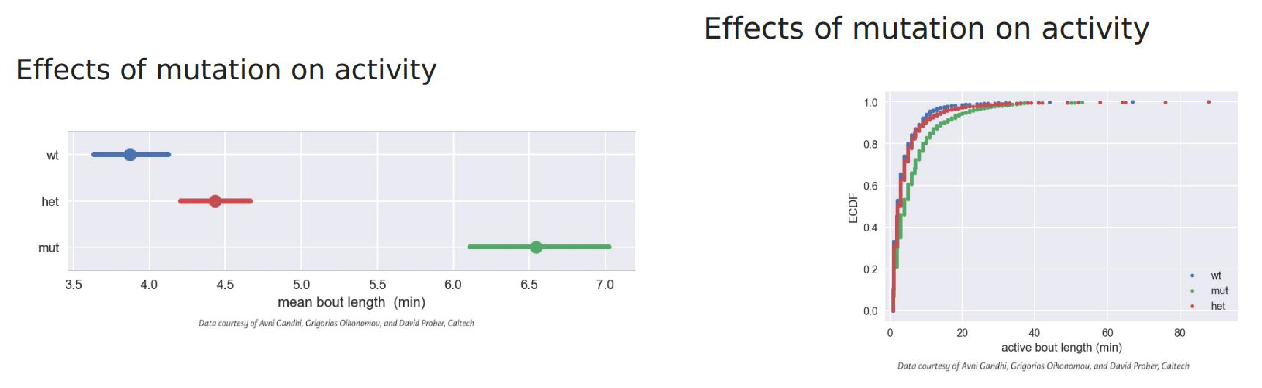

We have quantified the differences (between wt and het), and we can see them graphically (ecdf), so now is a 
good time to test the hypothesis that there is no difference between the Heterozygote and Wild type fish.


In [11]:
#vídeo

# Genotype definitions
#  - Wild type: No mutations
#  - Heterozygote: Mutation on one of two chromosomes
#  - Mutant: Mutation on both chromosomes

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "effects_mut.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "effects_mut2.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=-0.3, right=3, top=1, wspace=0, hspace=0)
plt.show()

print("""We have quantified the differences (between wt and het), and we can see them graphically (ecdf), so now is a 
good time to test the hypothesis that there is no difference between the Heterozygote and Wild type fish.""")

#########    

het:  mean = 4.434 min., confidence interval = [4.2, 4.7] min.



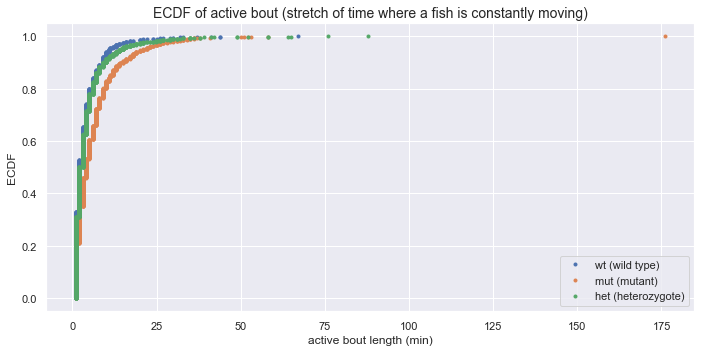

In [12]:
bout_lengths_het = np.array(bout[bout['genotype'] == 'het'].bout_length)
mean_het = np.mean(bout_lengths_het)
bs_reps_het = dcst.draw_bs_reps(bout_lengths_het, np.mean, size=10000)
conf_int_het = np.percentile(bs_reps_het, [2.5, 97.5])
print("""het:  mean = {0:.3f} min., confidence interval = [{1:.1f}, {2:.1f}] min.\n""".format(mean_het, *conf_int_het))

x_het, y_het = ecdf(bout_lengths_het)
# Plot the ECDFs
plt.plot(x_wt, y_wt, marker='.', linestyle='none')
plt.plot(x_mut, y_mut, marker='.', linestyle='none')
plt.plot(x_het, y_het, marker='.', linestyle='none')
# Make a legend, label axes, and show plot
plt.legend(('wt (wild type)', 'mut (mutant)', 'het (heterozygote)'))
plt.xlabel('active bout length (min)')
plt.ylabel('ECDF')
plt.title("ECDF of active bout (stretch of time where a fish is constantly moving)", fontsize=14)
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

**Hypothesis test:**
Assessment of how reasonable the observed data are assuming a hypothesis is true.

**p-value:**
The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the 
assumption the null hypothesis is true.

**Test statistic:**
A single number that can be computed from observed data and from data you simulate under the null hypothesis.
Serves as a basis of comparison.

*The p-value requires clear specification of:*
 - Null hypothesis that can be simulated.
 - Test statistic that can be calculated from observed and simulated data.
 - Definition of at least as extreme as.


*Pipeline for hypothesis testing:*
 - 1) Clearly state the null hypothesis
 - 2) Define your test statistic
 - 3) Generate many sets of simulated data assuming the null hypothesis is true
 - 4) Compute the test statistic for each simulated data set
   - The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for
     the real data.

*Specifying the test:*
 - **Null hypothesis**: the active bout lengths of wild type and heterozygotic fish are *identically distributed.(permutation)*
 - **Test statistic:** Difference in mean active bout length between heterozygotes and wild type.
 - **At least as extreme as:** Test statistic is greater than or equal to what was observed.
 
 
 

In [13]:
# Permutation test

# For each replicate:
#  - Scramble labels of data points
#  - Compute test statistic

###################

# permutation sample from two data sets
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

# multiple permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

# mean differences
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

####################

bout_lengths_het = np.array(bout[bout['genotype'] == 'het'].bout_length)

perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, dcst.diff_of_means, size=10000)


# p-value is fraction of replicates at least as extreme as what was observed
diff_means_obs = diff_of_means(bout_lengths_het, bout_lengths_wt)
                            
p_val = np.sum(perm_reps >= diff_means_obs) / len(perm_reps)

### fiz eu
print("diff_means_obs:", diff_means_obs)
print("p_val: ", p_val)                            

diff_means_obs: 0.560121515910077
p_val:  0.0006


Exercício 7

In [14]:
# Permutation test: wild type versus heterozygote

# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, 
                               dcst.diff_of_means, size=10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print("Observed difference: {}".format(diff_means_exp))
print('p-value =', p_val)

print("""\nA p-value of {} suggests that the observed difference in means is unlikely to occur if heterozygotic and wild 
type fish have active bout lengths that are identically distributed.\n""".format(p_val))

print("""\npodia também ter feito o plot dos ecdfs das permutações e ver que nunca ou quase nunca tocavam nos ecdf's do
het e wt.""")

Observed difference: 0.560121515910077
p-value = 0.0009

A p-value of 0.0009 suggests that the observed difference in means is unlikely to occur if heterozygotic and wild 
type fish have active bout lengths that are identically distributed.


podia também ter feito o plot dos ecdfs das permutações e ver que nunca ou quase nunca tocavam nos ecdf's do
het e wt.


Exercício 8

The permutation test has a pretty restrictive hypothesis, that the heterozygotic and wild type bout lengths are ***identically distributed***. Now, use a bootstrap hypothesis test to test the hypothesis that the ***means are equal, making no assumptions about the distributions.***

In [15]:
# Bootstrap hypothesis test

# as computed before
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

#####

# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted, np.mean, size=10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

print("""\nWe reject the hypothesis that both have the same mean. 
(podia tb ter feito o plot das linhas das réplicas das médias e ver que nunca ou quase nunca tocavam nas reais.)""")

print("""\nWe get a result of similar magnitude as the permutation test, though slightly smaller, probably because the 
heterozygote bout length distribution has a heavier tail to the right.""")

p-value = 0.001

We reject the hypothesis that both have the same mean. 
(podia tb ter feito o plot das linhas das réplicas das médias e ver que nunca ou quase nunca tocavam nas reais.)

We get a result of similar magnitude as the permutation test, though slightly smaller, probably because the 
heterozygote bout length distribution has a heavier tail to the right.


#### Exercício 9 - Linear regression and pairs bootstrap

   bacterial area (sq. microns)  time (hr)
0                      5.574735       0.00
1                      5.712023       0.25
2                      5.903395       0.50
3                      6.194612       0.75
4                      6.456708       1.00


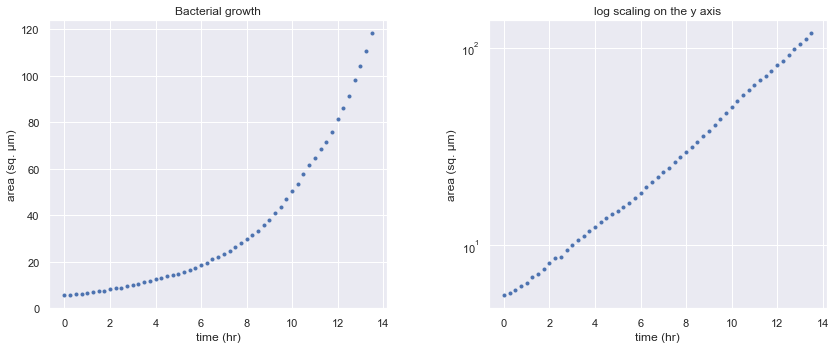

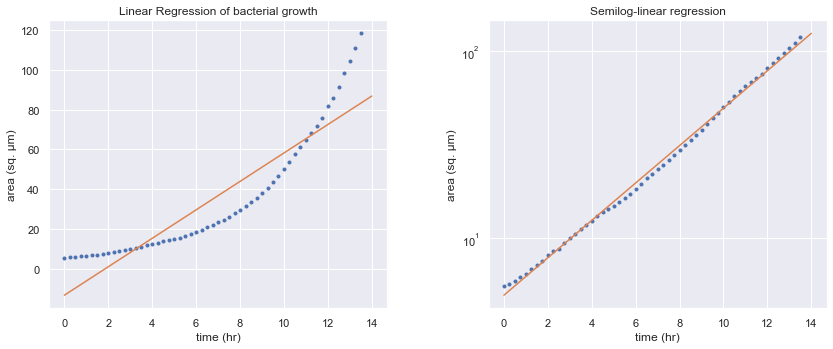

Pairs bootstrap:
 - Resample data in pairs
 - Compute slope and intercept from resampled data
 - Each slope and intercept is a bootstrap replicate
 - Compute confidence intervals from percentiles of bootstrap replicates



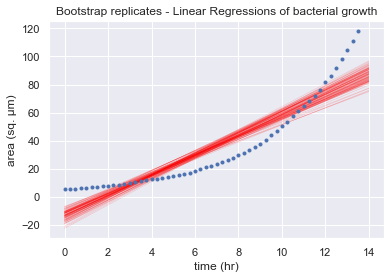

95% confidence interval of slope: [5.99652509 8.19838856]


In [16]:
#vídeo   

# Bacterial growth
# Computed from fluorescence microscopy images acquired by Jin Park in Michael Elowitz's lab at Caltech using image
# processing code written by Justin Bois.
bacterial_gr = pd.read_csv(data_folder + "park_bacterial_growth.csv", header=2)

print(bacterial_gr.head())

t = bacterial_gr['time (hr)']
bac_area = bacterial_gr['bacterial area (sq. microns)']

# Make a plot
plt.subplot(1, 2, 1)
plt.plot(t, bac_area, marker='.', linestyle='none')
plt.xlabel('time (hr)')
plt.ylabel('area (sq. µm)')
plt.title('Bacterial growth')

# Make a plot with log scaling on the y axis.
plt.subplot(1, 2, 2)
plt.semilogy(t, bac_area, marker='.', linestyle='none')
plt.xlabel('time (hr)')
plt.ylabel('area (sq. µm)')
plt.title('log scaling on the y axis')

plt.subplots_adjust(left=0, bottom=0, right=1.8, top=1, wspace=0.3, hspace=0.4)
plt.show()

###########

# Linear regression with np.polyfit()
slope, intercept = np.polyfit(t, bac_area, 1)

t_theor = np.array([0, 14])
bac_area_theor = slope * t_theor + intercept

plt.subplot(1, 2, 1)
plt.plot(t, bac_area, marker='.', linestyle='none')
plt.plot(t_theor, bac_area_theor)
plt.xlabel('time (hr)')
plt.ylabel('area (sq. µm)')
plt.title('Linear Regression of bacterial growth')

# Semilog-linear regression with np.polyfit()
slope, intercept = np.polyfit(t, np.log(bac_area), 1)

t_theor = np.array([0, 14])
bac_area_theor = np.exp(slope * t_theor + intercept)

plt.subplot(1, 2, 2)
plt.semilogy(t, bac_area, marker='.', linestyle='none')
plt.semilogy(t_theor, bac_area_theor)
plt.xlabel('time (hr)')
plt.ylabel('area (sq. µm)')
plt.title('Semilog-linear regression')
plt.subplots_adjust(left=0, bottom=0, right=1.8, top=1, wspace=0.3, hspace=0.4)
plt.show()

########################################################

# Pairs bootstrap
print("""Pairs bootstrap:
 - Resample data in pairs
 - Compute slope and intercept from resampled data
 - Each slope and intercept is a bootstrap replicate
 - Compute confidence intervals from percentiles of bootstrap replicates\n""")

# Draw 10000 pairs bootstrap reps from x_data and y_data
slope_reps, int_reps = dcst.draw_bs_pairs_linreg(t, bac_area, size=10000)

# Compute 95% confidence interval of slope
slope_conf_int = np.percentile(slope_reps, [2.5, 97.5])


# Plot the bootstrap lines
x = np.array([0, 14])
for i in range(100):
    plt.plot(x, slope_reps[i]*x + int_reps[i], linewidth=0.5, alpha=0.2, color='red')

plt.plot(t, bac_area, marker='.', linestyle='none')
plt.xlabel('time (hr)')
plt.ylabel('area (sq. µm)')
plt.title('Bootstrap replicates - Linear Regressions of bacterial growth')
plt.show()
print("95% confidence interval of slope: {}".format(slope_conf_int))

Exercício 10

In [17]:
# Assessing the growth rate

# Compute logarithm of the bacterial area: log_bac_area
log_bac_area = np.log(bac_area)

# Compute the slope and intercept: growth_rate, log_a0
growth_rate, log_a0 = np.polyfit(t, log_bac_area, 1)

# Draw 10,000 pairs bootstrap replicates: growth_rate_bs_reps, log_a0_bs_reps
growth_rate_bs_reps, log_a0_bs_reps = dcst.draw_bs_pairs_linreg(t, log_bac_area, size=10000)
    
# Compute confidence intervals: growth_rate_conf_int
growth_rate_conf_int = np.percentile(growth_rate_bs_reps, [2.5, 97.5])

# Print the result to the screen
print("""
Growth rate: {0:.4f} sq. µm/hour
95% confidence interval: [{1:.4f}, {2:.4f}] sq. µm/hour
""".format(growth_rate, *growth_rate_conf_int))

print("""Under these conditions, the bacteria add about 0.23 square micrometers worth of mass each hour. The error bar is
very tight, which we will see graphically in the next exercise.""")


Growth rate: 0.2301 sq. µm/hour
95% confidence interval: [0.2265, 0.2337] sq. µm/hour

Under these conditions, the bacteria add about 0.23 square micrometers worth of mass each hour. The error bar is
very tight, which we will see graphically in the next exercise.


Exercício 11

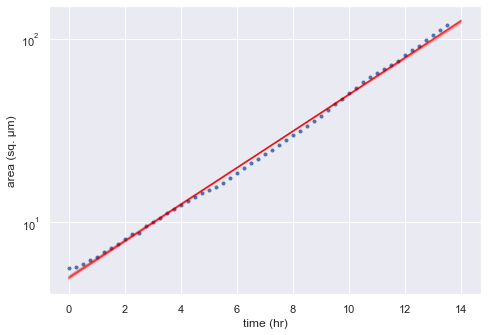

In [18]:
# Plotting the growth curve

# Plot data points in a semilog-y plot with axis labeles
plt.semilogy(t, bac_area, marker='.', linestyle='none')

# Generate x-values for the bootstrap lines: t_bs
t_bs = np.array([0, 14])

# Plot the first 100 bootstrap lines
for i in range(100):
    y = np.exp(growth_rate_bs_reps[i] * t_bs + log_a0_bs_reps[i])
    plt.semilogy(t_bs, y, linewidth=0.5, alpha=0.05, color='red')
    
# Label axes and show plot
plt.xlabel('time (hr)')
plt.ylabel('area (sq. µm)')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# CHAPTER 2 - Analysis of results of the 2015 FINA World Swimming Championships

In this chapter, you will practice your EDA, parameter estimation, and hypothesis testing skills on the results of the 2015 FINA World Swimming Championships.

#### Exercício 1 - Introduction to swimming data

In [19]:
#vídeo

fina_2015 = pd.read_csv(data_folder + "2015_FINA.csv", header=4)

# Strokes at the World Championships
#  - Freestyle
#  - Breaststroke
#  - Butterfly
#  - Backstroke

# Events at the World Championships
#  - Defined by gender, distance, stroke
#  - Example: men's 200 m freestyle

# Rounds of events
#  - Heats: First round
#  - Semifinals: Penultimate round in some events
#  - Finals: The final round; the winner is champion

# Data are freely available from OMEGA at omegatiming.com

print("Domain-specific knowledge is very important (ler acima)\n")

print(fina_2015.shape)
fina_2015.head()

Domain-specific knowledge is very important (ler acima)

(11423, 22)


,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,...,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
0,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,...,63.65,1,29.63,50,930.0,PRE,100,1,FLY,29.63
1,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,...,63.65,2,63.65,100,930.0,PRE,100,1,FLY,34.02
2,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,1,31.33,50,1014.0,PRE,200,1,FLY,31.33
3,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,2,66.81,100,1014.0,PRE,200,1,FLY,35.48
4,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,...,140.28,3,103.29,150,1014.0,PRE,200,1,FLY,36.48


Exercício 2

In [20]:
fina_2015.columns

Index(['athleteid', 'lastname', 'firstname', 'birthdate', 'gender', 'name',
       'code', 'eventid', 'heat', 'lane', 'points', 'reactiontime', 'swimtime',
       'split', 'cumswimtime', 'splitdistance', 'daytime', 'round', 'distance',
       'relaycount', 'stroke', 'splitswimtime'],
      dtype='object')

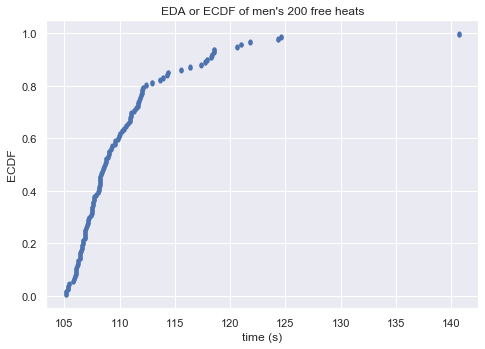

We see that fast swimmers are below 115 seconds, with a smattering of slow swimmers past that, including one 
very slow swimmer.


In [21]:
# Graphical EDA of men's 200 free heats

mens_200_free_heats = np.array(fina_2015[(fina_2015['gender'] == 'M') & (fina_2015['stroke'] == 'FREE') & 
                                         (fina_2015['distance'] == 200)].swimtime.dropna())  # it's only 1 nan

# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(mens_200_free_heats)

# Plot the ECDF as dots
plt.plot(x, y, marker='.', linestyle='none')

# Label axes and show plot
plt.xlabel('time (s)')
plt.ylabel('ECDF')
plt.title("EDA or ECDF of men's 200 free heats")

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""We see that fast swimmers are below 115 seconds, with a smattering of slow swimmers past that, including one 
very slow swimmer.""")

Exercício 3

In [22]:
# 200 m free time with confidence interval

# Now, you will practice parameter estimation and computation of confidence intervals by computing the mean and median swim
# time for the men's 200 freestyle heats. The median is useful because it is immune to heavy tails in the distribution of 
# swim times, such as the slow swimmers in the heats.

# Compute mean and median swim times
mean_time = np.mean(mens_200_free_heats)
median_time = np.median(mens_200_free_heats)

# Draw 10,000 bootstrap replicates of the mean and median
bs_reps_mean = dcst.draw_bs_reps(mens_200_free_heats, np.mean, size=10000)
bs_reps_median = dcst.draw_bs_reps(mens_200_free_heats, np.median, size=10000)


# Compute the 95% confidence intervals
conf_int_mean = np.percentile(bs_reps_mean, [2.5, 97.5])
conf_int_median = np.percentile(bs_reps_median, [2.5, 97.5])

# Print the result to the screen
print("""
mean time: {0:.2f} sec.
95% conf int of mean: [{1:.2f}, {2:.2f}] sec.

median time: {3:.2f} sec.
95% conf int of median: [{4:.2f}, {5:.2f}] sec.
""".format(mean_time, *conf_int_mean, median_time, *conf_int_median))

print("Indeed, the mean swim time is longer than the median because of the effect of the very slow swimmers.")


mean time: 110.43 sec.
95% conf int of mean: [109.92, 110.96] sec.

median time: 108.67 sec.
95% conf int of median: [108.27, 109.09] sec.

Indeed, the mean swim time is longer than the median because of the effect of the very slow swimmers.


#### Exercício 4 - Do swimmers go faster in the finals?

In [23]:
fina_2015[fina_2015['gender'] == 'F'].stroke.value_counts()

FREE      2986
MEDLEY     596
BREAST     591
FLY        532
BACK       531
Name: stroke, dtype: int64

For example, all Michael Phelps records were made in the final.

Do swimmers swim faster in the finals than in other rounds?  ---> definir bem a questão
  - Individual swimmers, or the whole field?
  - Faster than heats? Faster than semifinals?
  - For what strokes? For what distances?


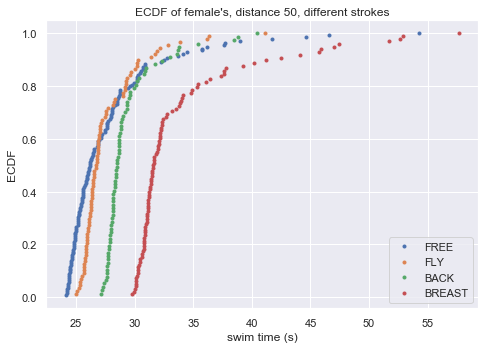

Question: Do individual female swimmers swim faster in the finals compared to the semifinals?
Events: 50, 100, 200 meter freestyle, breststroke, butterfly, backstroke.

Fractional improvement:


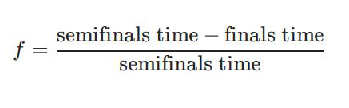

Your question(s):

Original question:
 - Do swimmers swim faster in the finals than in other rounds?

Sharpened questions:
 - What is the fractional improvement of individual female swimmers from the semifinals to the finals?
 - Is the observed fractional improvement commensurate with there being no difference in performance in the semifinals
    and finals?
    
The goal of this course is to learn how to pose questions well, beside using hacker stats.


In [24]:
#vídeo

print("""For example, all Michael Phelps records were made in the final.

Do swimmers swim faster in the finals than in other rounds?  ---> definir bem a questão
  - Individual swimmers, or the whole field?
  - Faster than heats? Faster than semifinals?
  - For what strokes? For what distances?""")

######################################################

# Different strokes
df = {}
for x in ['FREE', 'FLY', 'BACK', 'BREAST']:
    # para simplificar neste exemplo vou retirar os nan
    df["fem_50_{}".format(x)] = np.array(fina_2015[(fina_2015['gender'] == 'F') & (fina_2015['stroke'] == x) & 
                                                   (fina_2015['distance'] == 50)].swimtime.dropna())

# Generate x and y values for ECDF: x, y
for i in ['FREE', 'FLY', 'BACK', 'BREAST']:
    x, y = dcst.ecdf(df["fem_50_{}".format(i)])
    plt.plot(x, y, marker='.', linestyle='none')

# Label axes and show plot
plt.xlabel('swim time (s)')
plt.ylabel('ECDF')
plt.title("ECDF of female's, distance 50, different strokes")
plt.legend(['FREE', 'FLY', 'BACK', 'BREAST'])
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

######################################################

print("""Question: Do individual female swimmers swim faster in the finals compared to the semifinals?
Events: 50, 100, 200 meter freestyle, breststroke, butterfly, backstroke.\n""")

# Fractional improvement
print("Fractional improvement:")
imagem = plt.imread(data_folder + "fractional_improvement.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.show()

#######

print("""Your question(s):

Original question:
 - Do swimmers swim faster in the finals than in other rounds?

Sharpened questions:
 - What is the fractional improvement of individual female swimmers from the semifinals to the finals?
 - Is the observed fractional improvement commensurate with there being no difference in performance in the semifinals
    and finals?
    
The goal of this course is to learn how to pose questions well, beside using hacker stats.""")


Exercício 5

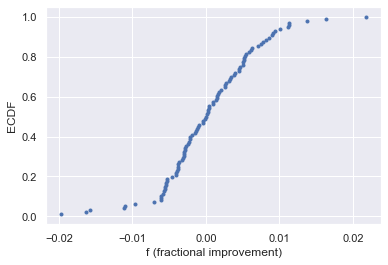

The median of the ECDF is juust above zero. But at first glance, it does not look like there is much of any
difference between semifinals and finals. We'll check this carefully in the next exercises.


In [25]:
# EDA: finals versus semifinals

# First, you will get an understanding of how athletes' performance changes from the semifinals to the finals by computing
# the fractional improvement from the semifinals to finals and plotting an ECDF of all of these values.

# The arrays final_times and semi_times contain the swim times of the respective rounds. The arrays are aligned such that 
# final_times[i] and semi_times[i] are for the same swimmer/event. 

########################################################################################################
df = fina_2015[['athleteid', 'stroke', 'distance', 'swimtime', 'lastname', 'splitswimtime']]
df.columns=['athleteid', 'stroke', 'distance', 'final_swimtime', 'lastname', 'semi_swimtime'] # valores !=
final_times = np.array([ 52.52,  24.12,  52.82,  24.36,  57.67, 116.41,  58.26,  27.66,
       125.81,  58.75,  27.92, 126.78,  25.93,  24.44,  27.26,  58.22,
       128.66,  24.39,  57.69, 143.61, 128.51,  30.74,  59.02,  27.11,
        57.85,  66.55, 142.76,  57.48,  25.37, 116.27,  54.76, 126.51,
        27.58, 130.2 , 142.76,  57.05,  25.34,  58.86,  27.73,  25.78,
       142.76,  25.85,  24.51,  59.78,  27.99,  57.94, 126.78, 128.49,
        28.17, 116.19, 126.84, 127.76, 129.53,  67.1 ,  31.12, 115.32,
        67.6 ,  66.42,  30.11, 125.56,  66.43, 141.15, 143.19,  66.36,
        30.14, 116.79,  53.58,  53.17,  24.22,  25.64,  26.2 , 116.16,
       127.64,  65.66,  30.13,  59.66, 143.59,  55.64,  52.7 ,  24.96,
        24.31,  67.17,  30.05,  31.14,  53.93,  24.57, 142.44, 115.16,
        59.4 , 115.49,  54.  , 126.34,  30.2 , 126.95,  59.99, 126.4 ])
semi_times = np.array([ 53.  ,  24.32,  52.84,  24.22,  57.59, 116.95,  58.56,  27.7 ,
       126.56,  59.05,  27.83, 127.57,  25.81,  24.38,  27.41,  58.05,
       128.99,  24.52,  57.52, 142.82, 128.16,  31.03,  59.33,  27.18,
        57.63,  66.28, 143.06,  57.36,  25.79, 116.44,  53.91, 127.08,
        27.67, 127.69, 141.99,  57.04,  25.27,  58.84,  27.63,  25.88,
       142.9 ,  25.71,  24.5 ,  59.71,  27.88,  57.77, 126.64, 129.16,
        28.01, 116.51, 126.18, 127.05, 129.04,  67.11,  30.9 , 116.23,
        66.95,  66.21,  30.78, 126.36,  66.64, 142.15, 142.88,  65.64,
        29.98, 116.91,  53.38,  53.78,  24.23,  25.9 ,  25.91, 116.56,
       128.74,  65.6 ,  30.14,  59.55, 142.72,  55.74,  52.78,  25.06,
        24.31,  66.76,  30.39,  30.64,  53.81,  24.47, 142.04, 116.76,
        59.42, 116.37,  53.92, 127.79,  30.25, 127.52,  59.63, 127.57])
########################################################################################################

# Compute fractional difference (improvement) in time between finals and semis
f = (semi_times - final_times) / semi_times

# Generate x and y values for the ECDF: x, y
x, y = dcst.ecdf(f)

# Make a plot of the ECDF
plt.plot(x, y, marker='.', linestyle='none' )

# Label axes and show plot
plt.xlabel('f (fractional improvement)')
plt.ylabel('ECDF')

plt.show()

print("""The median of the ECDF is juust above zero. But at first glance, it does not look like there is much of any
difference between semifinals and finals. We'll check this carefully in the next exercises.""")

Exercício 6

In [26]:
# Parameter estimates of difference between finals and semifinals

# Compute the mean fractional improvement from the semifinals to finals, along with a 95% confidence interval of the mean. 
f = (semi_times - final_times) / semi_times

# Mean fractional time difference: f_mean
f_mean = np.mean(f)

# Get bootstrap reps of mean: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, size=10000)

# Compute confidence intervals: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Report
print("""
mean fractional difference: {0:.5f}
95% confidence interval of mean fractional difference: [{1:.5f}, {2:.5f}]\n""".format(f_mean, *conf_int))

print("""It looks like the mean finals time is juuuust faster than the mean semifinal time, and they very well may be the
same. We'll test this hypothesis next.""")


mean fractional difference: 0.00040
95% confidence interval of mean fractional difference: [-0.00094, 0.00174]

It looks like the mean finals time is juuuust faster than the mean semifinal time, and they very well may be the
same. We'll test this hypothesis next.


Exercício 7

**How to do the permutation test**

Based on our EDA and parameter estimates, it is tough to discern improvement from the semifinals to finals. In the next exercise, you will test the hypothesis that there is *no difference in performance between the semifinals and finals*. A permutation test is fitting for this. We will use the *mean value of f as the test statistic*. Which of the following simulates getting the test statistic under the null hypothesis?

***Strategy 1***
 - Take an array of semifinal times and an array of final times for each swimmer for each stroke/distance pair.
 - Go through each array, and for each index, swap the entry in the respective final and semifinal array with a 50% probability.
 - Use the resulting final and semifinal arrays to compute f and then the mean of f.

***Strategy 2***
 - Take an array of semifinal times and an array of final times for each swimmer for each stroke/distance pair and concatenate them, giving a total of 96 entries.
 - Scramble the concatenated array using the np.permutation() function. Assign the first 48 entries in the scrambled array to be "semifinal" and the last 48 entries to be "final."
 - Compute f from these new semifinal and final arrays, and then compute the mean of f.

***Strategy 3***
 - Take the array f we used in the last exercise.
 - Multiply each entry of f by either 1 or -1 with equal probability.
 - Compute the mean of this new array to get the test statistic.

***Strategy 4***
 - Define a function with signature compute_f(semi_times, final_times) to compute f from inputted swim time arrays.
 - Draw a permutation replicate using dcst.draw_perm_reps(semi_times, final_times, compute_f).

In [27]:
print("""Strategy 1""")

Strategy 1


Exercício 8

In [28]:
# Generating permutation samples

# As you worked out in the last exercise, we need to generate a permutation sample by randomly swapping corresponding 
# entries in the semi_times and final_times array. Write a function with signature swap_random(a, b) that returns arrays
# where random indices have the entries in a and b swapped.

def swap_random(a, b):
    """Randomly swap entries in two arrays."""
    # Indices to swap
    swap_inds = np.random.random(size=len(a)) < 0.5
    
    # Make copies of arrays a and b for output
    a_out = np.copy(a)
    b_out = np.copy(b)
    
    # Swap values
    a_out[swap_inds] = b[swap_inds]
    b_out[swap_inds] = a[swap_inds]

    return a_out, b_out


Exercício 9

In [29]:
# Hypothesis test: Do women swim the same way in semis and finals?

# Test the hypothesis that performance in the finals and semifinals are identical using the mean of the fractional 
# improvement as your test statistic. The test statistic under the null hypothesis is considered to be at least as 
# extreme as what was observed if it is greater than or equal to f_mean

f_mean

# Set up array of permutation replicates
perm_reps = np.empty(1000)

for i in range(1000):
    # Generate a permutation sample
    semi_perm, final_perm = swap_random(semi_times, final_times)
    
    # Compute f from the permutation sample
    f = (semi_perm - final_perm) / semi_perm
    
    # Compute and store permutation replicate
    perm_reps[i] = np.mean(f)

# Compute and print p-value
print('p-value =', np.sum(perm_reps >= f_mean) / 1000)

print("""\nThe p-value is large, about {}, which suggests that the results of the 2015 World Championships are consistent
with there being no difference in performance between the finals and semifinals.""".format(
    round(np.sum(perm_reps >= f_mean) / 1000, 2)))


p-value = 0.255

The p-value is large, about 0.26, which suggests that the results of the 2015 World Championships are consistent
with there being no difference in performance between the finals and semifinals.


#### Exercício 10 - How does the performance of swimmers decline over long events?

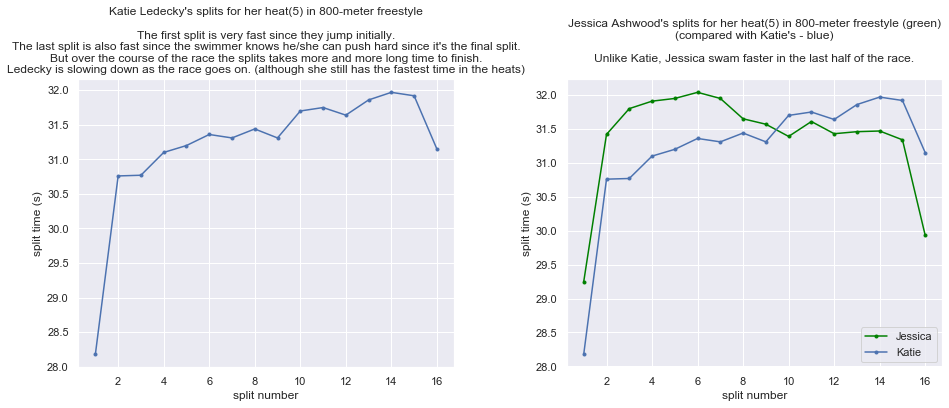

Just by looking at individual athletes, it's hard to quantify the general effect of fatigue as a (long) race goes
on. 

Quantifying slowdown:
 - Use women's 800 m freestyle heats (the heats only, so that we don't overcount athletes that got trough the final.)
 - Omit first and last 100 meters/2 splits (because of the jump and final effect)
 - Compute mean split time for each split number
 - Perform linear regression to get slowdown per split
 - Perform hypothesis test: can the slowdown be explained by random variation?

Hypothesis tests for correlation:
 - Null hypothesis: split time and split number are completely uncorrelated
 - Simulate data assuming null hypothesis is true  --> scrambled_split_number = np.random.permutation(split_number)
 - Use Pearson correlation, ρ, as test statistic   --> rho = dcst.pearson_r(scrambled_split_number, splits)
 - Compute p-value as the fraction of replicates that have ρ at least as large as observed



In [30]:
#vídeo

# More swimming background
#  - Split: The time is takes to swim one length of the pool

plt.subplot(1, 2, 1)
katie_800_free = fina_2015[(fina_2015['lastname'] == 'LEDECKY') & (fina_2015['distance'] == 800) & 
                          (fina_2015['stroke'] == 'FREE') & (fina_2015['heat'] == 5)]

plt.plot(katie_800_free['split'], katie_800_free['splitswimtime'], marker='.')
plt.xlabel('split number')
plt.ylabel('split time (s)')
plt.title("""Katie Ledecky's splits for her heat(5) in 800-meter freestyle\n
The first split is very fast since they jump initially.
The last split is also fast since the swimmer knows he/she can push hard since it's the final split.
But over the course of the race the splits takes more and more long time to finish.
Ledecky is slowing down as the race goes on. (although she still has the fastest time in the heats)""")

plt.subplot(1, 2, 2)    
jessica_800_free = fina_2015[(fina_2015['lastname'] == 'ASHWOOD') & (fina_2015['distance'] == 800) & 
                          (fina_2015['stroke'] == 'FREE') & (fina_2015['heat'] == 4)]

plt.plot(jessica_800_free['split'], jessica_800_free['splitswimtime'], marker='.', color='green')
plt.plot(katie_800_free['split'], katie_800_free['splitswimtime'], marker='.')

plt.xlabel('split number')
plt.ylabel('split time (s)')
plt.title("""Jessica Ashwood's splits for her heat(5) in 800-meter freestyle (green)
(compared with Katie's - blue)\n
Unlike Katie, Jessica swam faster in the last half of the race.
""")
plt.legend(['Jessica', 'Katie'])
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.3, hspace=0.4)
plt.show()

print("""Just by looking at individual athletes, it's hard to quantify the general effect of fatigue as a (long) race goes
on. """)

print("===========================================================================================================\n")

print("""Quantifying slowdown:
 - Use women's 800 m freestyle heats (the heats only, so that we don't overcount athletes that got trough the final.)
 - Omit first and last 100 meters/2 splits (because of the jump and final effect)
 - Compute mean split time for each split number
 - Perform linear regression to get slowdown per split
 - Perform hypothesis test: can the slowdown be explained by random variation?\n""")

print("""Hypothesis tests for correlation:
 - Null hypothesis: split time and split number are completely uncorrelated
 - Simulate data assuming null hypothesis is true  --> scrambled_split_number = np.random.permutation(split_number)
 - Use Pearson correlation, ρ, as test statistic   --> rho = dcst.pearson_r(scrambled_split_number, splits)
 - Compute p-value as the fraction of replicates that have ρ at least as large as observed
""")

Exercício 11

In [31]:
# EDA: Plot all your data


# To get a graphical overview of a data set, it is often useful to plot all of your data. In this exercise, plot all of the
# splits for all female swimmers in the 800 meter heats. The data are available in a Numpy arrays split_number and splits.
# The arrays are organized such that splits[i,j] is the split time for swimmer i for split_number[j].

#####################################################################################################################
# data preparation

# df for women's 800 m freestyle heats (the heats only, so that we don't overcount athletes that got trough the final.)
df_800_f = fina_2015[(fina_2015['gender'] == 'F') & (fina_2015['distance'] == 800) & (fina_2015['stroke'] == 'FREE') &
                    (fina_2015['round'] == 'PRE')]

# splits (we take the first 2 and last 2 as we've mentioned)
split_number = df_800_f['split'].unique()[2:-2]

# list of last names as presented (ordenados só para ficar igual ao exemplo)
last_names = sorted(set([i for i in df_800_f.lastname]), key=[i for i in df_800_f.lastname].index)

# split times for swimmers
splits = [list(round(df_800_f[df_800_f['lastname'] == i].splitswimtime[2:-2], 2)) for i in last_names]
splits = [x for x in splits if x != []] 

# The arrays are organized such that splits[i,j] is the split time for swimmer i for split_number[j].
#####################################################################################################################

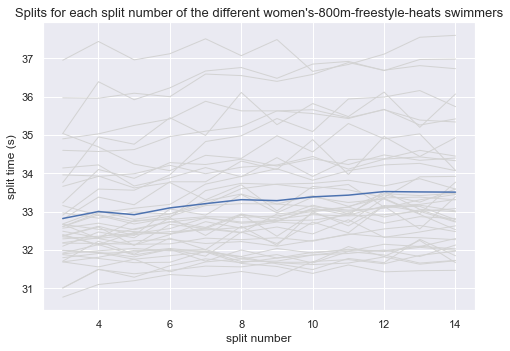

There is wide variability in the splits among the swimmers, and what appears to be a slight trend toward slower
split times.


In [32]:
# Plot the splits for each swimmer
for splitset in splits:
    plt.plot(split_number, splitset, linewidth=1, color='lightgray')

# Compute the mean split times (over rows, which will give the mean split time for each split number)
mean_splits = np.mean(splits, axis=0)

# Plot the mean split times for each split number
plt.plot(split_number, mean_splits)

# Label axes and show plot
plt.xlabel('split number')
plt.ylabel('split time (s)')
plt.title("Splits for each split number of the different women's-800m-freestyle-heats swimmers", fontsize=13)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""There is wide variability in the splits among the swimmers, and what appears to be a slight trend toward slower
split times.""")

Exercício 12

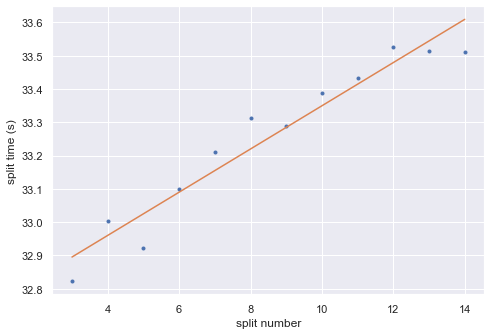


mean slowdown: 0.065 sec./split
95% confidence interval of mean slowdown: [0.052, 0.079] sec./split

There is a small (about 6 hundreths of a second), but discernible, slowdown per split. 
We'll do a hypothesis test next.


In [33]:
# Linear regression of average split time

# We will assume that the swimmers slow down in a linear fashion over the course of the 800 m event. 
# The slowdown per split is then the slope of the mean split time versus split number plot. Perform a linear regression 
# to estimate the slowdown per split and compute a pairs bootstrap 95% confidence interval on the slowdown. 
# Also show a plot of the best fit line.

# Note: We can compute error bars for the mean split times and use those in the regression analysis, but we will not take
# those into account here, as that is beyond the scope of this course.

###############################################

# Perform regression
slowdown, split_3 = np.polyfit(split_number, mean_splits, 1)

# Compute pairs bootstrap. 
# The bootstrap replicates of the intercept are not relevant for this analysis, so store them in the throwaway variable _.
bs_reps, _ = dcst.draw_bs_pairs_linreg(split_number, mean_splits, size=10000)

# Compute confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Plot the data with regression lines
plt.plot(split_number, mean_splits, marker='.', linestyle='none')
plt.plot(split_number, slowdown * split_number + split_3, '-')

# Label axes and show plot
plt.xlabel('split number')
plt.ylabel('split time (s)')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Print the slowdown per split
print("""
mean slowdown: {0:.3f} sec./split
95% confidence interval of mean slowdown: [{1:.3f}, {2:.3f}] sec./split""".format(slowdown, *conf_int))


print("""\nThere is a small (about 6 hundreths of a second), but discernible, slowdown per split. 
We'll do a hypothesis test next.""")


Exercício 13

In [34]:
# Hypothesis test: are they slowing down?

# Now we will test the null hypothesis that the swimmer's split time is not at all correlated with the distance they are at
# in the swim. We will use the Pearson correlation coefficient (computed using dcst.pearson_r()) as the test statistic.

# Pearson correlation coefficient
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

################################################

# Observed correlation
rho = dcst.pearson_r(split_number, mean_splits)

# Initialize permutation reps
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the split number array
    scrambled_split_number = np.random.permutation(split_number)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_split_number, mean_splits)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / len(perm_reps_rho)
print('p-value =', p_val)

print("""\nWith 10,000 replicates, we never got a correlation as big as observed under the hypothesis that the swimmers do
not change speed as the race progresses. In fact, I did the test with a million replicates, and still never got a single
replicate as big as the observed Pearson correlation coefficient.\n""")

p-value = 0.0

With 10,000 replicates, we never got a correlation as big as observed under the hypothesis that the swimmers do
not change speed as the race progresses. In fact, I did the test with a million replicates, and still never got a single
replicate as big as the observed Pearson correlation coefficient.



# Chapter 3 - The "Current Controversy" of the 2013 World Championships


Some swimmers said that they felt it was easier to swim in one direction versus another in the 2013 World Championships. Some analysts have posited that there was a swirling current in the pool. In this chapter, you'll investigate this claim. 

References:
- Quartz Media  https://qz.com/761280/researchers-believe-certain-lanes-in-the-olympic-pool-may-have-given-some-swimmers-an-advantage/
- Washington Post https://www.washingtonpost.com/gdpr-consent/?destination=%2fnews%2fwonk%2fwp%2f2016%2f09%2f01%2fthese-charts-clearly-show-how-some-olympic-swimmers-may-have-gotten-an-unfair-advantage%2f%3futm_term%3d.dba907006ba1
- SwimSwam  https://swimswam.com/rio-olympic-test-event-showed-same-pool-bias-2-0/
- and Cornett, et al.  https://www.ncbi.nlm.nih.gov/pubmed/25003776

#### Exercício 1 - Introduction to the controversy

Controversy: there was a swirl effect on Barcelona's 2013 World Championships pools.
Swimmers in lanes 8 and 9 for example would benefit from the current and 0 and 1 be prejudiced from it (in one side or 
50m race only).
The pools were temporary and deconstructed, so there was no way to measure the effect when the controversy appeared.

We will have to use statistics to find evidence of a current in the data of 2013 World Championship. 

The approach we will take is inspired by:
A. Cornett, C. Brammer, J. Stager, Current Controversy: Analysis of the 2013 FINA World Swimming Championships, Medicine
and Science in Sport Exercise, 47, 649-654, 2015


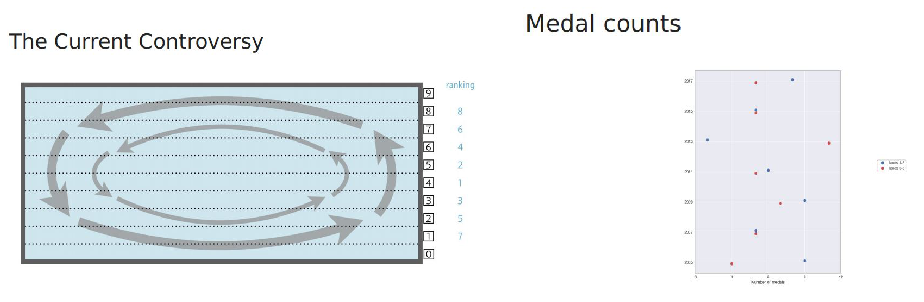

The swimmers in the center are expected to be the fastest. They fight less against currents.

We will first look at the 50m events, where the swimmers do not turn around.
Historically there is not a big disparity in lane-winners, except in 2013 where 11 out of 12 medals were awarded to 
swimmers of lanes 6-8.

If there is a equal chance of getting a medal in low lane numbers and high, the number of medals in low number
lanes is binomially distributed with probability 0.5. 
So the probability of getting 0 or 1 medal in lanes 1, 2, 3 is: 0.00303. Unlikely, bot not impossible.


Tasks:

 - Investigate improvement of individual swimmers moving from low- to high-numbered lanes in 50 m events.
 - Compute the size of the effect on speed.
 - Test the hypothesis that on average there is no difference between low- and high-numbered lanes.



In [35]:
#vídeo

# controversy
print("""Controversy: there was a swirl effect on Barcelona's 2013 World Championships pools.
Swimmers in lanes 8 and 9 for example would benefit from the current and 0 and 1 be prejudiced from it (in one side or 
50m race only).
The pools were temporary and deconstructed, so there was no way to measure the effect when the controversy appeared.

We will have to use statistics to find evidence of a current in the data of 2013 World Championship. 

The approach we will take is inspired by:
A. Cornett, C. Brammer, J. Stager, Current Controversy: Analysis of the 2013 FINA World Swimming Championships, Medicine
and Science in Sport Exercise, 47, 649-654, 2015""")
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "swirl.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "medals.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0)
plt.show()

# Citation

# A. Cornett, C. Brammer, J. Stager, Current Controversy: Analysis of the 2013 FINA World Swimming Championships, Medicine
#                                                         and Science in Sport Exercise, 47, 649-654, 2015

print("""The swimmers in the center are expected to be the fastest. They fight less against currents.

We will first look at the 50m events, where the swimmers do not turn around.
Historically there is not a big disparity in lane-winners, except in 2013 where 11 out of 12 medals were awarded to 
swimmers of lanes 6-8.""")

# How probable is it?
binom_draws = np.random.binomial(12, 0.5, size=100000)

print("""\nIf there is a equal chance of getting a medal in low lane numbers and high, the number of medals in low number
lanes is binomially distributed with probability 0.5. 
So the probability of getting 0 or 1 medal in lanes 1, 2, 3 is: {}. Unlikely, bot not impossible.""".format(
    np.sum(binom_draws <= 1) / 100000))

####################

print("""\n=======================================================================================================\n
Tasks:

 - Investigate improvement of individual swimmers moving from low- to high-numbered lanes in 50 m events.
 - Compute the size of the effect on speed.
 - Test the hypothesis that on average there is no difference between low- and high-numbered lanes.\n""")

Exercício 2

In [36]:
# A metric for improvement

# In your first analysis, you will investigate how times of swimmers in 50 m events change as they move between low
# numbered lanes (1-3) to high numbered lanes (6-8) in the semifinals and finals. We showed in the previous chapter that
# there is little difference between semifinal and final performance, so you will neglect any differences due to it being
# the final versus the semifinal. (são anos diferentes mas vamos admitir isto)

# You want to use as much data as you can, so use all four strokes for both the men's and women's competitions. As such, 
# what would be a good metric for improvement from one round to the next for an individual swimmer, where (ta) is the swim 
# time in a low numbered lane and (tb) is the swim time in a high numbered lane?

print("""Metric: 
- The fractional improvement of swim time, (ta - tb) / ta.

This is a good metric since it is independent of the basal speed (which is itself dependent on stroke and gender). \n""")

Metric: 
- The fractional improvement of swim time, (ta - tb) / ta.

This is a good metric since it is independent of the basal speed (which is itself dependent on stroke and gender). 



Exercício 3

In [37]:
# ECDF of improvement from low to high lanes

fina_2013 = pd.read_csv(data_folder + "2013_FINA.csv", comment='#')

# swimmers who swam a 50 m semifinal in a high numbered lane and the final in a low numbered lane, and vice versa. 
# The swim times are stored in the Numpy arrays swimtime_high_lanes and swimtime_low_lanes. Entry i in the respective 
# arrays are for the same swimmer in the same event.

swimtime_high_lanes = np.array(fina_2013[(fina_2013['distance'] == 50) & 
                                         (fina_2013['round'] == 'FIN') &
                                         (fina_2013['lane'] <= 3) & (fina_2013['lane'] >= 1)].dropna().splitswimtime)

swimtime_low_lanes = np.array(fina_2013[(fina_2013['distance'] == 50) & 
                                        (fina_2013['round'] == 'FIN') &
                                         (fina_2013['lane'] >= 6) & (fina_2013['lane'] <= 8)].dropna().splitswimtime)

#era necessário fazer mais alguma transformação nos dados, não tinham exatamente o mesmo número de linhas para dps comparar

swimtime_high_lanes = np.array([24.62, 22.9 , 27.05, 24.76, 30.31, 24.54, 26.12, 27.71, 23.15,
       23.11, 21.62, 28.02, 24.73, 24.95, 25.83, 30.61, 27.04, 21.67,
       27.16, 30.23, 21.51, 22.97, 28.05, 21.65, 24.54, 26.06])

swimtime_low_lanes = np.array([24.66, 23.28, 27.2 , 24.95, 32.34, 24.66, 26.17, 27.93, 23.35,
       22.93, 21.93, 28.33, 25.14, 25.19, 26.11, 31.31, 27.44, 21.85,
       27.48, 30.66, 21.74, 23.22, 27.93, 21.42, 24.79, 26.46])

print(fina_2013.shape)
fina_2013.head(3)
###############################################################################################

(9967, 22)


,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,...,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
0,244414,KASHARI,ANXHELA,1996-01-01,F,ALBANIA,ALB,33,4,1,...,28.48,1,28.48,50,1000.0,PRE,50,1,FREE,28.48
1,244417,BORSHI,NOEL,1996-01-01,F,ALBANIA,ALB,1,2,3,...,66.77,1,30.84,50,1000.0,PRE,100,1,FLY,30.84
2,244417,BORSHI,NOEL,1996-01-01,F,ALBANIA,ALB,1,2,3,...,66.77,2,66.77,100,1000.0,PRE,100,1,FLY,35.93


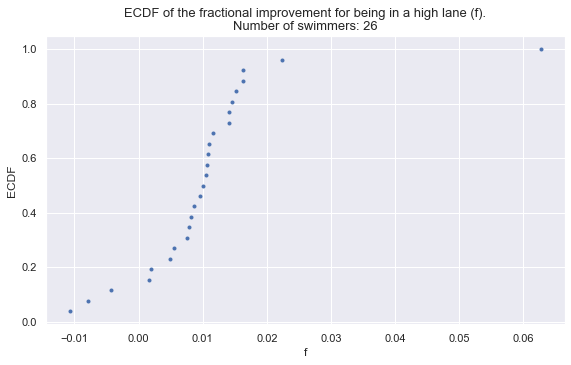

This is starting to paint a picture of lane bias.
The ECDF demonstrates that all but 3 of the 26 swimmers swam faster in the high numbered lanes.


In [38]:
# Compute the fractional improvement of being in high lane: f
f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes

# Make x and y values for ECDF: x, y
x, y = dcst.ecdf(f)

# Plot the ECDFs as dots
plt.plot(x, y, marker='.', linestyle='none')

# Label the axes and show the plot
plt.xlabel('f')
plt.ylabel('ECDF')
plt.title("""ECDF of the fractional improvement for being in a high lane (f).
Number of swimmers: {}""".format(len(f)), fontsize=13)

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

print("""This is starting to paint a picture of lane bias.
The ECDF demonstrates that all but 3 of the 26 swimmers swam faster in the high numbered lanes.""")

Exercício 4

In [39]:
# Estimation of mean improvement

# You will now estimate how big this current effect is. 
# Compute the mean fractional improvement for being in a high-numbered lane versus a low-numbered lane, along with a 95%
# confidence interval of the mean.

# Compute the mean difference: f_mean
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, size=10000)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Print the result
print("""
mean fractional difference: {0:.5f}
95% confidence interval of mean fractional difference: [{1:.5f}, {2:.5f}]\n""".format(f_mean, *conf_int))

print("Looks like swimmers are faster in lanes 6-8.")


mean fractional difference: 0.01051
95% confidence interval of mean fractional difference: [0.00612, 0.01590]

Looks like swimmers are faster in lanes 6-8.


Exercício 5

In [40]:
# How should we test the hypothesis?

print("""You are interested in the presence of lane bias toward higher lanes, presumably due to a slight current in the 
pool. A natural null hypothesis to test, then, is that the mean fractional improvement going from low to high lane numbers
is zero. Which of the following is a good way to simulate this null hypothesis?\n""")

# As a reminder, the arrays swimtime_low_lanes and swimtime_high_lanes contain the swim times for lanes 1-3 and 6-8, 
# respectively, and we define the fractional improvement as 
# f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes

You are interested in the presence of lane bias toward higher lanes, presumably due to a slight current in the 
pool. A natural null hypothesis to test, then, is that the mean fractional improvement going from low to high lane numbers
is zero. Which of the following is a good way to simulate this null hypothesis?



 - **1)** Randomly swap swimtime_low_lanes[i] and swimtime_high_lanes[i] with probability 0.5. From these randomly swapped arrays, compute the fractional improvement. The test statistic is the mean of this new f array.

In [41]:
# This is simulating a different hypothesis, that whether a swimmer is in a high-numbered lane or a low-numbered lane has
# no bearing on the swim time. This is a perfectly reasonable hypothesis to test, but it is not the one we are testing here.

 - **2)** Scramble the entries in the swimtime_high_lanes, and recompute f from the scrambled array and the swimtime_low_lanes array. The test statistic is the mean of this new f array.

In [42]:
# If you scramble one of the arrays of swim times, you are then comparing a swim of a high lane number and a swim of a low 
# lane number for a different swimmer for a different stroke.

 - **3)** Shift the swimtime_low_lanes and swimtime_high_lanes arrays by adding a constant value to each so that the shifted arrays have the same mean. Compute the fractional improvement, f_shift, from these shifted arrays. Then, take a bootstrap replicate of the mean from f_shift.

In [43]:
# This is not correct, but the difference is subtle. If you do (3), you are simulating the hypothesis that averaging over
# all swimmers and strokes, the average swim time in high lanes is equal to that in low lanes. This is not the same as
# testing that the average fractional improvement is zero. We definitely want to test that the average fractional 
# difference is zero because we want to normalize out differences in speed across strokes and gender.

 - **4)** Subtract the mean of f from f to generate f_shift. Then, take bootstrap replicate of the mean from this f_shift.

In [44]:
print("""Correct answer.""")

Correct answer.


Exercício 6

In [45]:
# Hypothesis test: Does lane assignment affect performance?

# Perform a bootstrap hypothesis test of the null hypothesis that the mean fractional improvement going from low-numbered 
# lanes to high-numbered lanes is zero. Take the fractional improvement as your test statistic, and "at least as extreme 
# as" to mean that the test statistic under the null hypothesis is greater than or equal to what was observed.

# Shift f: f_shift
f_shift = f - f_mean

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, size=100000)

# Compute and report the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000
print('p-value =', p_val)

print("""\nThe probability of getting a f as extreme as the observed one is nearly 0, hence we can conclude that there is 
an effect. A p-value of {} is quite small and suggests that the mean fractional improvement is greater than zero. 

For fun, I tested the more restrictive hypothesis that lane number has no bearing at all on performance (item (1) in the
previous MCQ), and I got an even smaller p-value, of about 0.00001.
""".format(p_val))

p-value = 0.00038

The probability of getting a f as extreme as the observed one is nearly 0, hence we can conclude that there is 
an effect. A p-value of 0.00038 is quite small and suggests that the mean fractional improvement is greater than zero. 

For fun, I tested the more restrictive hypothesis that lane number has no bearing at all on performance (item (1) in the
previous MCQ), and I got an even smaller p-value, of about 0.00001.



Exercício 7

In [46]:
# Did the 2015 event have this problem?

# You would like to know if this is a typical problem with pools in competitive swimming. To address this question, perform
# a similar analysis for the results of the 2015 FINA World Championships. That is, compute the mean fractional improvement
# for going from lanes 1-3 to lanes 6-8 for the 2015 competition, along with a 95% confidence interval on the mean. 
# Also test the hypothesis that the mean fractional improvement is zero.

# The arrays swimtime_low_lanes_15 and swimtime_high_lanes_15 have the pertinent data.

swimtime_low_lanes_15 = np.array([27.66, 24.69, 23.29, 23.05, 26.87, 31.03, 22.04, 24.51, 21.86,
                                  25.64, 25.91, 24.77, 30.14, 27.23, 24.31, 30.2 , 26.86])

swimtime_high_lanes_15 = np.array([27.7 , 24.64, 23.21, 23.09, 26.87, 30.74, 21.88, 24.5 , 21.86,
                                   25.9 , 26.2 , 24.73, 30.13, 26.92, 24.31, 30.25, 26.76])

##########################################################################################

# Compute f and its mean
f = (swimtime_low_lanes_15 - swimtime_high_lanes_15) / swimtime_low_lanes_15
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates
bs_reps = dcst.draw_bs_reps(f, np.mean, size=10000)

# Compute 95% confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Shift f
f_shift = f - f_mean

# Draw 100,000 bootstrap replicates of the mean
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, size=100000)

# Compute the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000

# Print the results
print("""
mean fractional difference: {0:.5f}
95% confidence interval of mean fractional difference: [{1:.5f}, {2:.5f}]
p-value: {3:.5f}\n""".format(f_mean, *conf_int, p_val))

print("""Both the confidence interval an the p-value suggest that there was no lane bias in 2015.""")


mean fractional difference: 0.00079
95% confidence interval of mean fractional difference: [-0.00183, 0.00336]
p-value: 0.28254

Both the confidence interval an the p-value suggest that there was no lane bias in 2015.


#### Exercício 8 - The zigzag effect

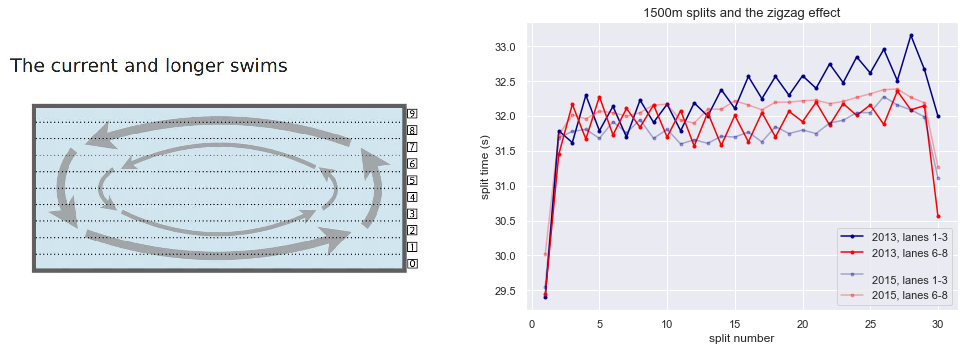

Fast even split and slow odd splits in low numbered lanes. Also present for high numbered lanes but out of phase:
slow even splits and fast odd splits. This zigzag effect is not present in 2015. 


In [47]:
#vídeo

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "longer_swims_swirl.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 2, 2)
# women's 1500m final freestyle - mean split times
wom_2013_high = fina_2013[(fina_2013['gender'] == 'F') & (fina_2013['distance'] == 1500) & 
                          (fina_2013['round'] == 'FIN') & (fina_2013['stroke'] == 'FREE') & 
                          (fina_2013['lane'] >= 6) & (fina_2013['lane'] <= 8)]  

wom_2013_low = fina_2013[(fina_2013['gender'] == 'F') & (fina_2013['distance'] == 1500) & 
                          (fina_2013['round'] == 'FIN') & (fina_2013['stroke'] == 'FREE') & 
                          (fina_2013['lane'] >= 1) & (fina_2013['lane'] <= 3)]

wom_2015_high = fina_2015[(fina_2015['gender'] == 'F') & (fina_2015['distance'] == 1500) & 
                          (fina_2015['round'] == 'FIN') & (fina_2015['stroke'] == 'FREE') & 
                          (fina_2015['lane'] >= 6) & (fina_2015['lane'] <= 8)] 

wom_2015_low = fina_2015[(fina_2015['gender'] == 'F') & (fina_2015['distance'] == 1500) & 
                          (fina_2015['round'] == 'FIN') & (fina_2015['stroke'] == 'FREE') & 
                          (fina_2015['lane'] >= 1) & (fina_2015['lane'] <= 3)] 

split_number_1500 = fina_2013['split'].unique()  # either for 2013 or 2015

# splitswimtime
y_2013_high = [round(np.mean(wom_2013_high[wom_2013_high['split'] == i].splitswimtime), 2) for i in split_number_1500]
y_2013_low = [round(np.mean(wom_2013_low[wom_2013_low['split'] == i].splitswimtime), 2) for i in split_number_1500]
y_2015_high = [round(np.mean(wom_2015_high[wom_2015_high['split'] == i].splitswimtime), 2) for i in split_number_1500]
y_2015_low = [round(np.mean(wom_2015_low[wom_2015_low['split'] == i].splitswimtime), 2) for i in split_number_1500]

# plot
plt.plot(split_number_1500, y_2013_low, marker='.', color='darkblue')
plt.plot(split_number_1500, y_2013_high, marker='.', color='red')
plt.plot(split_number_1500, y_2015_low, marker='.', color='darkblue', alpha=0.3)
plt.plot(split_number_1500, y_2015_high, marker='.', color='red', alpha=0.3)

plt.xlabel('split number')
plt.ylabel('split time (s)')
plt.title('1500m splits and the zigzag effect', fontsize=13)
plt.legend(['2013, lanes 1-3', '2013, lanes 6-8', '\n2015, lanes 1-3', '2015, lanes 6-8'])

plt.subplots_adjust(left=0, bottom=0, right=2.2, top=1, wspace=0.2, hspace=0)
plt.show()

print("""Fast even split and slow odd splits in low numbered lanes. Also present for high numbered lanes but out of phase:
slow even splits and fast odd splits. This zigzag effect is not present in 2015. """)

Exercício 9

In [48]:
# Which splits should we consider?

# As you proceed to quantitatively analyze the zigzag effect in the 1500 m, which splits should you include in our analysis?
# (see zigzag plot)

print("""All splits except the first two and the last two. The last two because swimmers stop pacing themselves and "kick"
for the final stretch. The first two are different because they involve jumping off the starting blocks and more underwater
swimming than others.""")

All splits except the first two and the last two. The last two because swimmers stop pacing themselves and "kick"
for the final stretch. The first two are different because they involve jumping off the starting blocks and more underwater
swimming than others.


Exercício 10

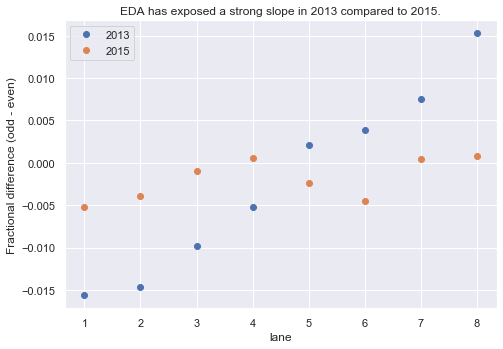

In [49]:
# EDA: mean differences between odd and even splits

# To investigate the differences between odd and even splits, you first need to define a difference metric. In previous 
# exercises, you investigated the improvement of moving from a low-numbered lane to a high-numbered lane, defining
# f = (ta - tb) / ta. There, the ta in the denominator served as our reference time for improvement. 
# Here, you are considering both improvement and decline in performance depending on the direction of swimming, so you want
# the reference to be an average. 
# So, we will define the fractional difference as
# f = 2(ta - tb) / (ta + tb).

# Your task here is to plot the mean fractional difference between odd and even splits versus lane number. I have already
# calculated the mean fractional differences for the 2013 and 2015 Worlds for you, and they are stored in f_13 and f_15.
# The corresponding lane numbers are in the array lanes.

f_13 = np.array([-0.01562214, -0.0146381 , -0.00977673, -0.00525713,  0.00204104, 0.00381014,  0.0075664 ,  0.01525869])
f_15 = np.array([-0.00516018, -0.00392952, -0.00099284,  0.00059953, -0.002424, -0.00451099,  0.00047467,  0.00081962])
lanes = np.array([1, 2, 3, 4, 5, 6, 7, 8])

###########################################################################################

# Plot the the fractional difference for 2013 and 2015
plt.plot(lanes, f_13, marker='.', markersize=12, linestyle='none')
plt.plot(lanes, f_15, marker='.', markersize=12, linestyle='none')

# Add a legend
plt.legend((2013, 2015))

# Label axes and show plot
plt.xlabel('lane')
plt.ylabel('Fractional difference (odd - even)')
plt.title("EDA has exposed a strong slope in 2013 compared to 2015.")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 11


slope: 0.00447 per lane
95% conf int: [0.00393, 0.00502] per lane


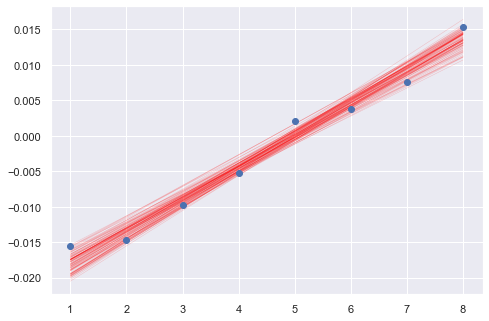

The slope is a fractional difference of about 0.4% per lane. This is quite a substantial difference at this elite
level of swimming where races can be decided by tiny differences.


In [50]:
# How does the current effect depend on lane position?

# To quantify the effect of lane number on performance, perform a linear regression on the f_13 versus lanes data. 
# Do a pairs bootstrap calculation to get a 95% confidence interval. 
# Finally, make a plot of the regression.

# Note that we could compute error bars on the mean fractional differences and use them in the regression, but that is 
# beyond the scope of this course.


# Compute the slope and intercept of the frac diff/lane curve
slope, intercept = np.polyfit(lanes, f_13, 1)

# Compute bootstrap replicates
bs_reps_slope, bs_reps_int = dcst.draw_bs_pairs_linreg(lanes, f_13, size=10000)

# Compute 95% confidence interval of slope
conf_int = np.percentile(bs_reps_slope, [2.5, 97.5])

# Print slope and confidence interval
print("""
slope: {0:.5f} per lane
95% conf int: [{1:.5f}, {2:.5f}] per lane""".format(slope, *conf_int))

# x-values for plotting regression lines
x = np.array([1, 8])

# Plot 100 bootstrap replicate lines
for i in range(100):
    plt.plot(x, bs_reps_slope[i] * x + bs_reps_int[i], color='red', alpha=0.2, linewidth=0.5)

# Update the plot
plt.plot(lanes, f_13, marker='.', markersize=12, linestyle='none')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""The slope is a fractional difference of about 0.4% per lane. This is quite a substantial difference at this elite
level of swimming where races can be decided by tiny differences.""")

Exercício 12

In [51]:
# Hypothesis test: can this be by chance?

# The EDA and linear regression analysis is pretty conclusive. Nonetheless, you will top off the analysis of the zigzag 
# effect by testing the hypothesis that lane assignment has nothing to do with the mean fractional difference between even
# and odd lanes using a permutation test. You will use the Pearson correlation coefficient, which you can compute with
# dcst.pearson_r() as the test statistic.

#####################

# Compute observed correlation: rho
rho = dcst.pearson_r(lanes, f_13)

# Initialize permutation reps: perm_reps_rho
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the lanes array: scrambled_lanes
    scrambled_lanes = np.random.permutation(lanes)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_lanes, f_13)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p-value =', p_val)

print("\nThe p-value is very small, as you would expect from the confidence interval of the last exercise.")

p-value = 0.0

The p-value is very small, as you would expect from the confidence interval of the last exercise.


#### Exercício 13 - Recap of swimming analysis

In [52]:
#vídeo

# Statistical inference pipeline:
#  - Exploratory data analysis
#     - Sharpen the question
#  - Optimal parameter calculation with confidence interval
#  - Hypothesis test

# Chapter 4 - Statistical seismology and the Parkfield region

Herein, you'll use your statistical thinking skills to study the frequency and magnitudes of earthquakes. Along the way, you'll learn some basic statistical seismology, including the Gutenberg-Richter law. This exercise exposes two key ideas about data science: 1) As a data scientist, you wander into all sorts of domain specific analyses, which is very exciting. You constantly get to learn. 2) You are sometimes faced with limited data, which is also the case for many of these earthquake studies. You can still make good progress.

#### Exercício 1 - Introduction to statistical seismology and the Parkfield experiment

Parkfield region: one of the most seismic active regions in the world.
Blue dots - epicenters of earthquakes of at least magnitude 4 in the Parkfield region, since 1950.


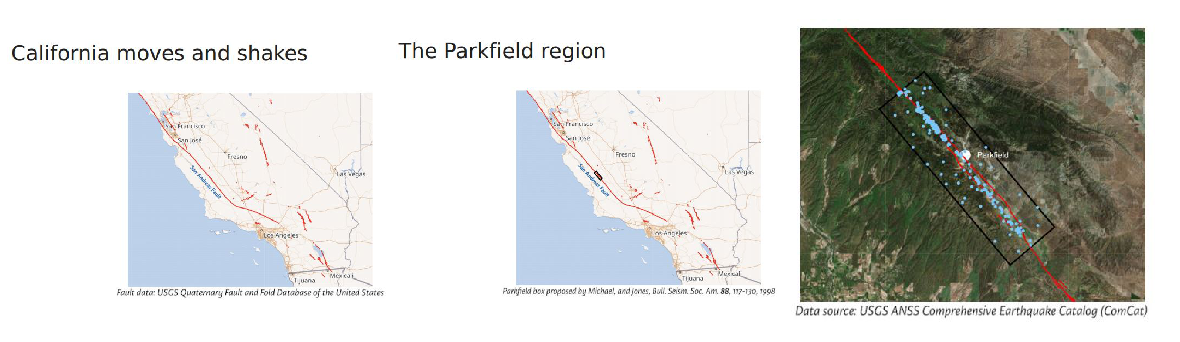


Earthquakes of magnitude >= 5 in Japan in the period 1990-1999.

When looking at the ECDF's, we see that the magnitudes seem to be exponentially distributed, with one exception.
Up until now, every time we encountered the exponential distribution the lowest value was close to 0. Here, it is 5.
The magnitude 5, in this case, is a location parameter. 

A location parameter defines the shift of the distribution along the x-axis. Equivalently, defining 'm' as the magnitude,
we can say that the green ECDF represents the variable m' = m - 5 ~ Exponential.

In the context of statistical seismology, the location parameter is called the "completeness threshold", denoted 'm_t'
(will see the reason for this name later).


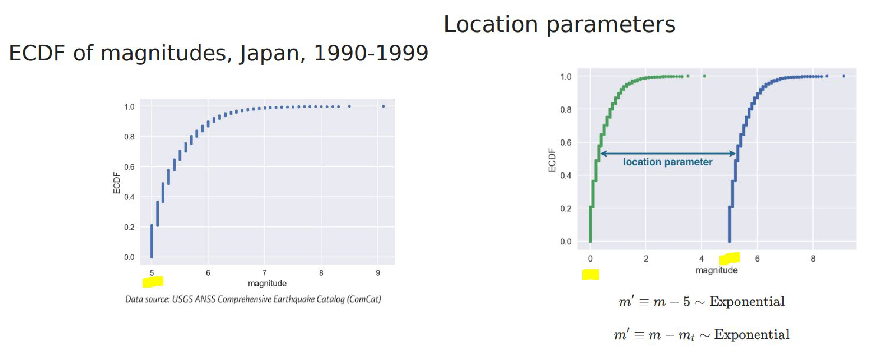

Whether or not we have a non-zero location parameter, the distribution is still exponential. This, in fact, seems
to be a general characteristic of earthquakes and it has a name: The Gutenberg-Richter Law.

The Gutenberg-Richter Law: The magnitudes of earthquakes in a given region over a given time period are Exponentially 
distributed.

This is convenient for characterizing earthquake magnitudes since the exponential distribution has a single parameter, the 
optimal value of which is given by the completeness threshold subtracted by the mean of the measured earthquake magnitudes.
This parameter, given by 'm.mean()' − 'm_t' , describes earthquake magnitudes for a region.

For historical reasons, seismologists do not use the mean directly, but the mean times natural log of 10. The result is a 
measure of seismicity called 'b-value'.


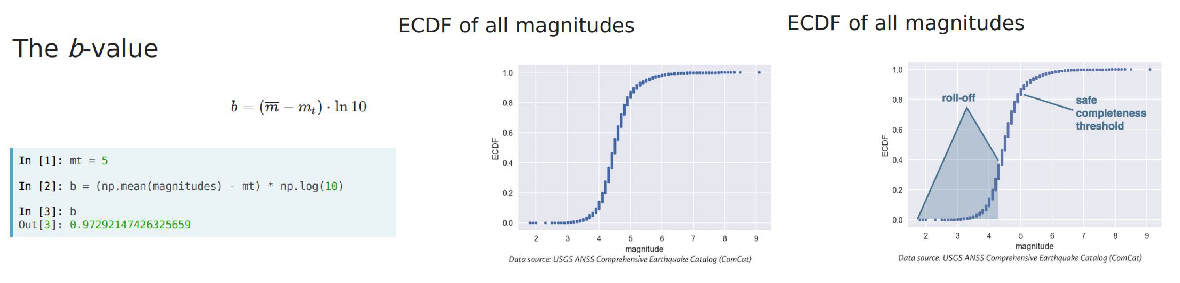

ECDF of all the detected earthquakes in Japan in the 90's:
For low magnitude earthquakes we see a strong departure from exponentiality --> this is called 'roll-off'. It is due to the
fact that lower magnitude earthquakes are difficult to detect. 

Now you see where does the name 'Completeness threshold' comes from: The magnitude, m_t, above which all earthquakes in a 
region can be detected, above which we can measure earthquakes.


In [53]:
#vídeo

print("""Parkfield region: one of the most seismic active regions in the world.
Blue dots - epicenters of earthquakes of at least magnitude 4 in the Parkfield region, since 1950.""")
plt.subplot(1, 3, 1)
imagem = plt.imread(data_folder + "california_shakes.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 3, 2)
imagem = plt.imread(data_folder + "parkfield_region.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 3, 3)
imagem = plt.imread(data_folder + "parkfield.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0)
plt.show()

print("""==============================================================================================================\n
Earthquakes of magnitude >= 5 in Japan in the period 1990-1999.\n
When looking at the ECDF's, we see that the magnitudes seem to be exponentially distributed, with one exception.
Up until now, every time we encountered the exponential distribution the lowest value was close to 0. Here, it is 5.
The magnitude 5, in this case, is a location parameter. 

A location parameter defines the shift of the distribution along the x-axis. Equivalently, defining 'm' as the magnitude,
we can say that the green ECDF represents the variable m' = m - 5 ~ Exponential.

In the context of statistical seismology, the location parameter is called the "completeness threshold", denoted 'm_t'
(will see the reason for this name later).""")

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "ecdf_japan.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "ecdf_location.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0)
plt.show()

print("""Whether or not we have a non-zero location parameter, the distribution is still exponential. This, in fact, seems
to be a general characteristic of earthquakes and it has a name: The Gutenberg-Richter Law.

The Gutenberg-Richter Law: The magnitudes of earthquakes in a given region over a given time period are Exponentially 
distributed.

This is convenient for characterizing earthquake magnitudes since the exponential distribution has a single parameter, the 
optimal value of which is given by the completeness threshold subtracted by the mean of the measured earthquake magnitudes.
This parameter, given by 'm.mean()' − 'm_t' , describes earthquake magnitudes for a region.

For historical reasons, seismologists do not use the mean directly, but the mean times natural log of 10. The result is a 
measure of seismicity called 'b-value'.""")

plt.subplot(1, 3, 1)
imagem = plt.imread(data_folder + "b_value.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 3, 2)
imagem = plt.imread(data_folder + "ecdf_all.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 3, 3)
imagem = plt.imread(data_folder + "ecdf_all_2.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0)
plt.show()

print("""ECDF of all the detected earthquakes in Japan in the 90's:
For low magnitude earthquakes we see a strong departure from exponentiality --> this is called 'roll-off'. It is due to the
fact that lower magnitude earthquakes are difficult to detect. 

Now you see where does the name 'Completeness threshold' comes from: The magnitude, m_t, above which all earthquakes in a 
region can be detected, above which we can measure earthquakes.""")

Exercício 2

(9991, 26)


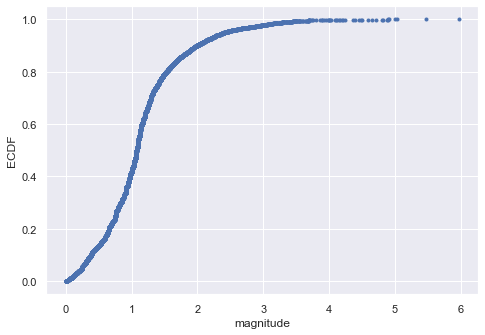

Note the distinctive roll-off at magnitudes below 1.0.


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,loc_name,loc_admin1,loc_admin2,loc_cc
0,1951-10-03 13:44:33.170,35.869333,-120.451000,6.0,3.67,ml,6.0,259.0,1.5480,0.43,...,31.61,0.154,10.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
1,1953-05-28 07:58:34.510,36.004167,-120.501167,6.0,3.61,ml,7.0,296.0,0.9139,0.39,...,31.61,NaN,1.0,reviewed,ci,ci,Coalinga,California,Fresno County,US
2,1961-12-14 11:51:15.410,35.970000,-120.470167,6.0,3.95,ml,12.0,297.0,0.8718,0.51,...,31.61,0.070,11.0,reviewed,ci,ci,Coalinga,California,Fresno County,US
3,1965-02-21 18:39:24.500,35.881000,-120.383500,6.0,3.54,ml,10.0,257.0,1.5380,0.56,...,31.61,0.048,11.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
4,1966-06-28 04:18:36.180,35.856500,-120.446167,6.0,3.15,ml,7.0,259.0,1.3120,0.32,...,31.61,0.105,7.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US


In [54]:
# Parkfield earthquake magnitudes

# data
parkfield = pd.read_csv(data_folder + "parkfield_earthquakes_1950-2017.csv", comment='#')

print(parkfield.shape)

# As usual, you will start with EDA and plot the ECDF of the magnitudes of earthquakes detected in the Parkfield region 
# from 1950 to 2016. The magnitudes of all earthquakes in the region from the ANSS ComCat are stored in the Numpy array 
# mags.

# When you do it this time, though, take a shortcut in generating the ECDF. You may recall that putting an asterisk before
# an argument in a function splits what follows into separate arguments. Since dcst.ecdf() returns two values, we can pass
# them as the x, y positional arguments to plt.plot() as plt.plot(*dcst.ecdf(data_you_want_to_plot)).

# You will use this shortcut in this exercise and going forward.

mags = np.array(parkfield['mag'])

#####################################

# Make the plot
plt.plot(*dcst.ecdf(mags), marker='.', linestyle='none')

# Label axes and show plot
plt.xlabel('magnitude')
plt.ylabel('ECDF')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""Note the distinctive roll-off at magnitudes below 1.0.""")

parkfield.head()

Exercício 3

In [55]:
# Computing the b-value

# The b-value is a common metric for the seismicity of a region. You can imagine you would like to calculate it often when
# working with earthquake data. For tasks like this that you will do often, it is best to write a function. 

# So, write a function with signature b_value(mags, mt, perc=[2.5, 97.5], n_reps=None) that returns the b-value and 
# (optionally, if n_reps is not None) its confidence interval for a set of magnitudes, mags. The completeness threshold is
# given by mt. The perc keyword argument gives the percentiles for the lower and upper bounds of the confidence interval,
# and n_reps is the number of bootstrap replicates to use in computing the confidence interval.


def b_value(mags, mt, perc=[2.5, 97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
  
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]

    # Compute b-value: b. The best estimate for the b-value is b = (m - mt)·ln(10). 
    b = (np.mean(m) - mt)*np.log(10)

    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m, np.mean, size=n_reps)

        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)

        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps, perc)
    
        return b, conf_int


Exercício 4

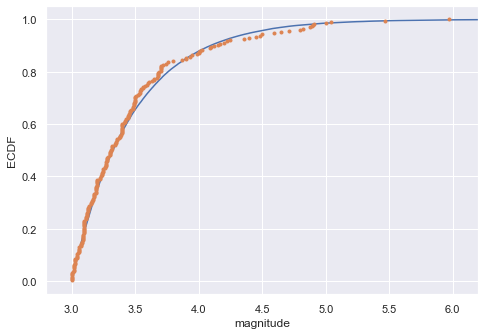

b-value: 1.08
95% confidence interval: [0.94, 1.24]

Parkfield seems to follow the Gutenberg-Richter law very well. 
The b-value of about 1 is typical for regions along fault zones.


In [56]:
# The b-value for Parkfield

# The ECDF is effective at exposing roll-off, as you could see below magnitude 1. Because there are plenty of earthquakes
# above magnitude 3, you can use mt = 3 as your completeness threshold. With this completeness threshold, compute the 
# b-value for the Parkfield region from 1950 to 2016, along with the 95% confidence interval. 

# --> Overlay the theoretical Exponential CDF to verify that the Parkfield region follows the Gutenberg-Richter Law.

mt = 3

##########

# Compute b-value and 95% confidence interval
b, conf_int = b_value(mags, mt=3, perc=[2.5, 97.5], n_reps=10000)

# Generate samples to for theoretical ECDF. The mean for the distribution is b/np.log(10), and you need to add mt to your
# samples to appropriately handle the location parameter. 
m_theor = np.random.exponential(b/np.log(10), size=100000) + mt

# Plot the theoretical CDF
plt.plot(*dcst.ecdf(m_theor), linestyle='-')

# Plot the ECDF (slicing mags >= mt)
plt.plot(*dcst.ecdf(mags[mags >= mt]), marker='.', linestyle='none')

# Pretty up and show the plot
plt.xlabel('magnitude')
plt.ylabel('ECDF')
plt.xlim(2.8, 6.2)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Report the results
print("""b-value: {0:.2f}
95% confidence interval: [{1:.2f}, {2:.2f}]""".format(b, *conf_int))

print("""\nParkfield seems to follow the Gutenberg-Richter law very well. 
The b-value of about 1 is typical for regions along fault zones.""")

#### Exercício 5 - Timing of major earthquakes and the Parkfield sequence

2 main models for earthquake timing:
 - Exponential: Earthquakes happen like a Poisson process.
 - Gaussian: Earthquakes happen with a well-defined period.


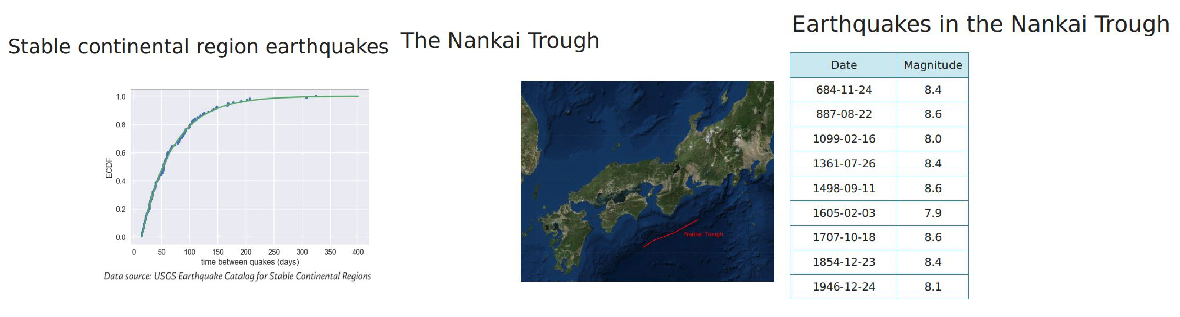

Big earthquakes seem to happen more or less every 200 years.


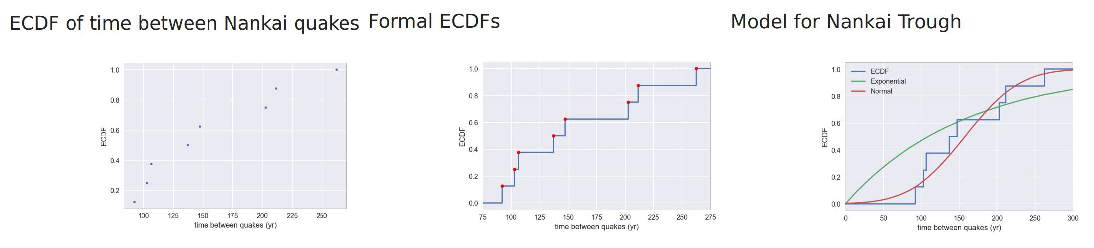

With just a few data points it is hard to see the shape of the ECDF. Formally, the ECDF of x is defined as the 
fraction of datapoints that are <= x.
The function dcst.ecdf(*..., formal=True) allows to make these formal ECDF's.

Generating theoretical distributions --> in this case the timing of the Nankai mega earthquakes seems to follow the 
Gaussian model more closely than the Exponential. 


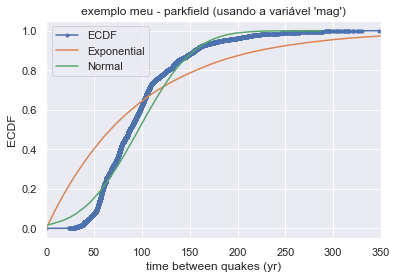

In [57]:
#vídeo

print("""2 main models for earthquake timing:
 - Exponential: Earthquakes happen like a Poisson process.
 - Gaussian: Earthquakes happen with a well-defined period.""")

plt.subplot(1, 3, 1)
imagem = plt.imread(data_folder + "stable_.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 3, 2)
imagem = plt.imread(data_folder + "nankai.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 3, 3)
imagem = plt.imread(data_folder + "nankai_earthquakes.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0)
plt.show()

print("Big earthquakes seem to happen more or less every 200 years.")

plt.subplot(1, 3, 1)
imagem = plt.imread(data_folder + "ecdf_nankai_time.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 3, 2)
imagem = plt.imread(data_folder + "formal_ecdf.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 3, 3)
imagem = plt.imread(data_folder + "model_nankai.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1.5, right=2.5, top=1, wspace=0, hspace=0)
plt.show()

print("""With just a few data points it is hard to see the shape of the ECDF. Formally, the ECDF of x is defined as the 
fraction of datapoints that are <= x.
The function dcst.ecdf(*..., formal=True) allows to make these formal ECDF's.

Generating theoretical distributions --> in this case the timing of the Nankai mega earthquakes seems to follow the 
Gaussian model more closely than the Exponential. """)

#############################################################

time_gap = parkfield.gap

plt.plot(*dcst.ecdf(time_gap), marker='.')

# Generating theoretical distributions

# Compute the mean & std time gap
mean_time_gap = np.mean(time_gap)
std_time_gap = np.std(time_gap)

# Generate theoretical Exponential distribution of timings
time_gap_exp = np.random.exponential(mean_time_gap, size=100000)

# Generate theoretical Normal distribution of timings
time_gap_norm = np.random.normal(mean_time_gap, std_time_gap, size=100000)

# Plot theoretical CDFs
plt.plot(*dcst.ecdf(time_gap_exp))
plt.plot(*dcst.ecdf(time_gap_norm))

plt.xlim(0, 350)
plt.legend(['ECDF', 'Exponential', 'Normal'], loc="best")
plt.title("exemplo meu - parkfield (usando a variável 'mag')")
plt.xlabel('time between quakes (yr)')
plt.ylabel('ECDF')
plt.show()

Exercício 6

Mean time gap: 24.619210586666668
Standard deviation time gap: 8.447554703269772


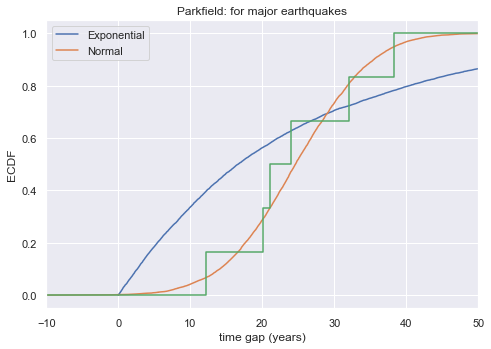

By eye, the Gaussian model seems to describe the observed data best. We will investigate the consequences of this
in the next exercise, and see if we can reject the Exponential model in coming exercises.


In [58]:
# Interearthquake time estimates for Parkfield

# In this exercise, you will first compute the best estimates for the parameters for the Exponential and Gaussian models 
# for interearthquake times. You will then plot the theoretical CDFs for the respective models along with the formal ECDF
# of the actual Parkfield interearthquake times.

# não sei por que variável selecionaram os maiores terramotos, há pouco filtrei por 'mag', mas aqui uso os dados deles:
time_gap = np.array([24.06570842, 20.07665982, 21.01848049, 12.24640657, 32.05475702, 38.2532512 ])

###############################################

# Compute the mean time gap: mean_time_gap. The time gaps between the major earthquakes, in units of years, are stored in
# time_gap.
mean_time_gap = np.mean(time_gap)

# Standard deviation of the time gap: std_time_gap
std_time_gap = np.std(time_gap)

print("Mean time gap: {}".format(mean_time_gap))
print("Standard deviation time gap: {}".format(std_time_gap))

# Generate theoretical Exponential distribution of timings: time_gap_exp
time_gap_exp = np.random.exponential(mean_time_gap, size=10000)

# Generate theoretical Normal distribution of timings: time_gap_norm
time_gap_norm = np.random.normal(mean_time_gap, std_time_gap, size=10000)

# Plot theoretical CDFs
plt.plot(*dcst.ecdf(time_gap_exp))
plt.plot(*dcst.ecdf(time_gap_norm))

# Plot Parkfield ECDF
plt.plot(*dcst.ecdf(time_gap, formal=True, min_x=-10, max_x=50))

# Add legend
plt.legend(('Exponential', 'Normal'), loc='upper left')

# Label axes, set limits and show plot
plt.xlabel('time gap (years)')
plt.ylabel('ECDF')
plt.xlim(-10, 50)
plt.title('Parkfield: for major earthquakes')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""By eye, the Gaussian model seems to describe the observed data best. We will investigate the consequences of this
in the next exercise, and see if we can reject the Exponential model in coming exercises.""")

Exercício 7

In [59]:
# When will the next big Parkfield quake be?

# The last big earthquake in the Parkfield region was on the evening of September 27, 2004 local time. Your task is to get
# an estimate as to when the next Parkfield quake will be, assuming the Exponential model and also the Gaussian model. 
# In both cases, the best estimate is given by the mean time gap, which you computed in the last exercise to be 24.62 years,
# meaning that the next earthquake would be in 2029. Compute 95% confidence intervals on when the next earthquake will be
# assuming an Exponential distribution parametrized by mean_time_gap you computed in the last exercise. 
# Do the same assuming a Normal distribution parametrized by mean_time_gap and std_time_gap.

today = 2019.774573079592
last_quake = 2004.74

########################

# Draw samples from the Exponential distribution: exp_samples
exp_samples = np.random.exponential(mean_time_gap, size=100000)

# Draw samples from the Normal distribution: norm_samples
norm_samples = np.random.normal(mean_time_gap, std_time_gap, size=100000)

# No earthquake as of today, so only keep samples that are long enough. Slice out samples that are greater than 
# today - last_quake
exp_samples = exp_samples[exp_samples > today - last_quake]
norm_samples = norm_samples[norm_samples > today - last_quake]

# Compute the confidence intervals with medians
conf_int_exp = np.percentile(exp_samples, [2.5, 50, 97.5]) + last_quake
conf_int_norm = np.percentile(norm_samples, [2.5, 50, 97.5]) + last_quake

# Print the results
print('Exponential:', conf_int_exp)
print('     Normal:', conf_int_norm)

print("""\nThe models given decidedly different predictions. The Gaussian model says the next earthquake is almost sure to
be in the next few decades, but the Exponential model says we may very well have to wait longer.""")


Exponential: [2020.37187099 2036.7326342  2111.3633529 ]
     Normal: [2020.61638778 2030.72035084 2046.47561842]

The models given decidedly different predictions. The Gaussian model says the next earthquake is almost sure to
be in the next few decades, but the Exponential model says we may very well have to wait longer.


#### Exercício 8 - How are the Parkfield interearthquake times distributed?

Knowing how the time between major earthquakes is distributed makes a big difference for acessing when the next
earthquake will strike.

It turns out that the Parkfield sequence has been central in the science of earthquake prediction. In the mid 1980's, 
scientists predicted the next Parkfield quake would occur in 1988 and almost certainly no later than 1993. They performed
a linear regression as a basis for their prediction (which is essentially assuming a Gaussian model) - But the earthquake
did not come in 1988 nor 1993: it came in late 2004. 
In light of this, we will work out whether we can dismiss the exponential model, presumably favoring the Gaussian model,
in the exercises. 

For illustration now, we will look at the Nankai quakes in the context of the Gaussian model. We will test the hypothesis 
that the Nankai megatrust earthquakes are normally distributed.


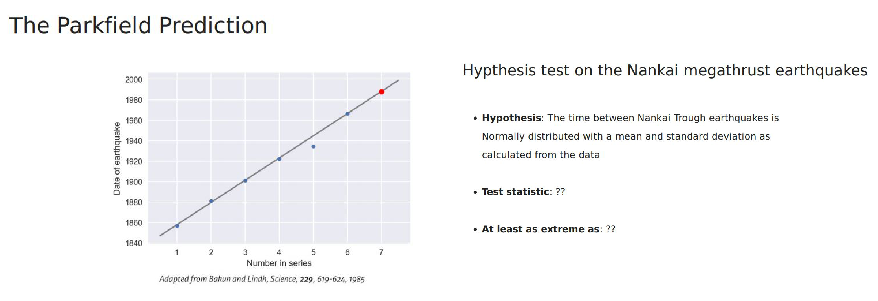

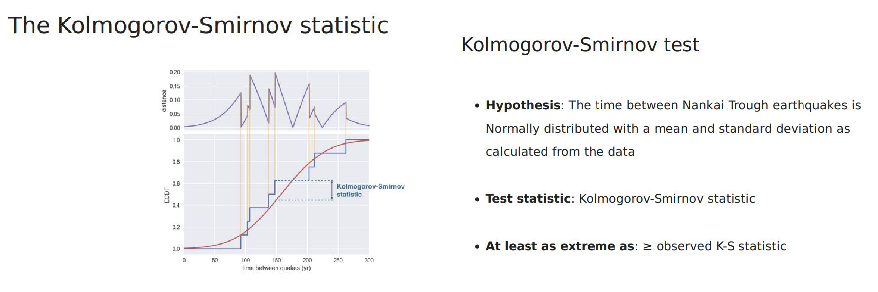

What is a reasonable test statistic to measure how close an ECDF to a theoretical cumulative distribution function?
(in this case the normal CDF). We could take as a test statistic the maximum of these distances (graph above) - this seems
like a reasonable measure of the distance between the empirical CDF and that of the distribution we are testing against.
The maximum distance occurs around 150 years (see graph) and has a value of about 0.2. This maximum distance has a name:
The Kolmogorov-Smirnov statistic. But how do we compute withouth having to do graphs like this? It helps to look at where
the local maximum distances occur. 

In every case, the local maximum is at a corner of the formal ECDF. Note that the corner can either be a concave corner, at
the top of the step, or a convex corner, at the base of the step. We will use these ideas to build a Kolmogorov-Smirnov
statistic.


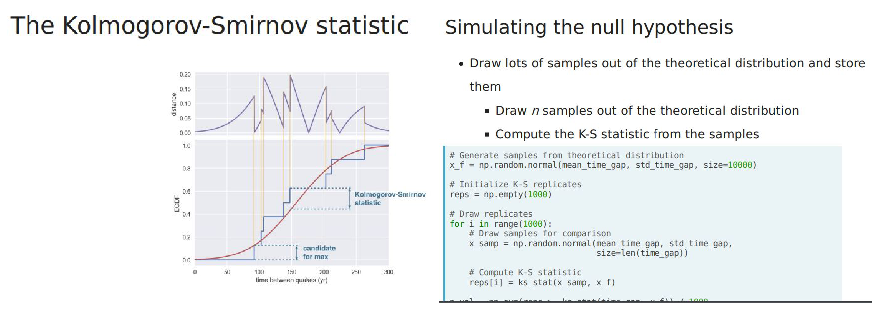

Doing the Kolmogorov-Smirnov test.
p-value: 0.925


In [60]:
#vídeo

print("""Knowing how the time between major earthquakes is distributed makes a big difference for acessing when the next
earthquake will strike.

It turns out that the Parkfield sequence has been central in the science of earthquake prediction. In the mid 1980's, 
scientists predicted the next Parkfield quake would occur in 1988 and almost certainly no later than 1993. They performed
a linear regression as a basis for their prediction (which is essentially assuming a Gaussian model) - But the earthquake
did not come in 1988 nor 1993: it came in late 2004. 
In light of this, we will work out whether we can dismiss the exponential model, presumably favoring the Gaussian model,
in the exercises. 

For illustration now, we will look at the Nankai quakes in the context of the Gaussian model. We will test the hypothesis 
that the Nankai megatrust earthquakes are normally distributed.""")

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "parkfield_prediction.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "hypothesis_nankai.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0.1, hspace=0)
plt.show()

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "k-s_0.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "k-s_test.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0.1, hspace=0)
plt.show()

print("""What is a reasonable test statistic to measure how close an ECDF to a theoretical cumulative distribution function?
(in this case the normal CDF). We could take as a test statistic the maximum of these distances (graph above) - this seems
like a reasonable measure of the distance between the empirical CDF and that of the distribution we are testing against.
The maximum distance occurs around 150 years (see graph) and has a value of about 0.2. This maximum distance has a name:
The Kolmogorov-Smirnov statistic. But how do we compute withouth having to do graphs like this? It helps to look at where
the local maximum distances occur. 

In every case, the local maximum is at a corner of the formal ECDF. Note that the corner can either be a concave corner, at
the top of the step, or a convex corner, at the base of the step. We will use these ideas to build a Kolmogorov-Smirnov
statistic.""")

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "k-s.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "simulation_null.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0)
plt.show()

print("""Doing the Kolmogorov-Smirnov test.""")

# Generate samples from theoretical distribution
x_f = np.random.normal(mean_time_gap, std_time_gap, size=10000)

# Initialize K-S replicates
reps = np.empty(1000)

# Draw replicates
for i in range(1000):
    # Draw samples for comparison
    x_samp = np.random.normal(mean_time_gap, std_time_gap, size=len(time_gap))

    # Compute K-S statistic
    reps[i] = dcst.ks_stat(x_samp, x_f)

p_val = np.sum(reps >= dcst.ks_stat(time_gap, x_f)) / 1000

print("p-value: {}".format(p_val))


Exercício 9

In [61]:
# Computing the value of a formal ECDF

# To be able to do the Kolmogorov-Smirnov test, we need to compute the value of a formal ECDF at arbitrary points. 
# In other words, we need a function, ecdf_formal(x, data) that returns the value of the formal ECDF derived from the data
# set data for each value in the array x. Two of the functions accomplish this, one will not. 
# Of the two that do the calculation correctly, one is faster. Label each.

# As a reminder, the ECDF is formally defined as ECDF(x) = (number of samples ≤ x) / (total number of samples). 
# You also might want to check out the doc string of np.searchsorted().

##############

# a)
def ecdf_formal(x, data):
    return np.searchsorted(np.sort(data), x) / len(data)

# b)
def ecdf_formal(x, data):
    return np.searchsorted(np.sort(data), x, side='right') / len(data)     # <--------

# c)
def ecdf_formal(x, data):
    output = np.empty(len(x))
    data = np.sort(data)
    for i, x_val in x:
        j = 0
        while j < len(data) and x_val >= data[j]:
            j += 1
        output[i] = j

    return output / len(data)


print("""(a) Incorrect;   
(b) Correct, fast; 
(c) Correct, slow.""")
# (a) will fail if a value in x is directly on one of the data points.

(a) Incorrect;   
(b) Correct, fast; 
(c) Correct, slow.


Exercício 10

In [62]:
# Computing the K-S statistic

# Write a function to compute the Kolmogorov-Smirnov statistic from two datasets, data1 and data2, in which data2 consists
# of samples from the theoretical distribution you are comparing your data to. 

# Note that this means we are using hacker stats to compute the K-S statistic for a dataset and a theoretical distribution,
# **not** the K-S statistic for two empirical datasets. 

# Conveniently, the function you just selected for computing values of the formal ECDF is given as dcst.ecdf_formal().

##########

def ks_stat(data1, data2):
    # Compute the values of the convex corners of the formal ECDF for data1: x, y
    x, y = dcst.ecdf(data1)
    
    # Compute the values of the theoretical CDF, determined from data2, at the convex corners x. 
    cdf = dcst.ecdf_formal(x, data2)

    # Compute distances between concave corners and CDF
    D_top = y - cdf

    # Compute distance between convex corners and CDF
    D_bottom = cdf - y + 1/len(data1)

    return np.max((D_top, D_bottom))


Exercício 11

In [63]:
# Drawing K-S replicates

# Now, you need a function to draw Kolmogorov-Smirnov replicates out of a target distribution, f. 
# Construct a function with signature draw_ks_reps(n, f, args=(), size=10000, n_reps=10000) to do so. 
# Here, 'n' is the number of data points, and 'f' is the function you will use to generate samples from the target CDF. 
# For example, to test against an Exponential distribution, you would pass 'np.random.exponential' as 'f'. 
# This function usually takes arguments, which must be passed as a tuple. So, if you wanted to take samples from an
# Exponential distribution with mean 'x_mean', you would use the 'args=(x_mean,)' keyword. 
# The keyword arguments 'size' and 'n_reps' respectively represent the number of samples to take from the target
# distribution and the number of replicates to draw.

##############

def draw_ks_reps(n, f, args=(), size=10000, n_reps=10000):
    # Generate samples from target distribution
    x_f = f(*args, size=size)
    
    # Initialize K-S replicates
    reps = np.empty(n_reps)
    
    # Draw replicates
    for i in range(n_reps):
        # Draw samples for comparison
        x_samp = f(*args, size=n)
        
        # Compute K-S statistic
        reps[i] = dcst.ks_stat(data1, data2)

    return reps


# And now you have yet another valuable tool (which we have again conveniently put in dcst.draw_ks_reps())
# This will allow you to draw K-S replicates for use in K-S tests for arbitrary continuous distributions.

Exercício 12

In [64]:
# The K-S test for Exponentiality

# Test the null hypothesis that the interearthquake times of the Parkfield sequence are Exponentially distributed.
# That is, earthquakes happen at random with no memory of when the last one was. 


# Draw target distribution: x_f
x_f = np.random.exponential(mean_time_gap, size=10000)

# Compute K-S stat: d
d = dcst.ks_stat(time_gap, x_f)

# Draw K-S replicates: reps
reps = dcst.draw_ks_reps(len(time_gap), np.random.exponential, args=(mean_time_gap,), size=10000, n_reps=10000)

# Compute and print p-value
p_val = np.sum(reps >= d) / 10000
print('p-value =', p_val)

print("""\nThat's a p-value above 0.2. This means that the Parkfield sequence is not outside the realm of possibility if 
earthquakes there are a Poisson process. This does not mean that they are generated by a Poisson process, but that the 
observed sequence is not incongruous with that model. The upshot is that it is really hard to say when the next Parkfield
quake will be.""")

p-value = 0.2439

That's a p-value above 0.2. This means that the Parkfield sequence is not outside the realm of possibility if 
earthquakes there are a Poisson process. This does not mean that they are generated by a Poisson process, but that the 
observed sequence is not incongruous with that model. The upshot is that it is really hard to say when the next Parkfield
quake will be.


# Chapter 5 - Earthquakes and oil mining in Oklahoma

Of course, earthquakes have a big impact on society, and recently are connected to human activity. In this final chapter, you'll investigate the effect that increased injection of saline wastewater due to oil mining in Oklahoma has had on the seismicity of the region.

#### Exercício 1 - Variations in earthquake frequency and seismicity

Natural causes, like the eruption of Mt St Helens in 1980 caused earthquakes around the area to increase.


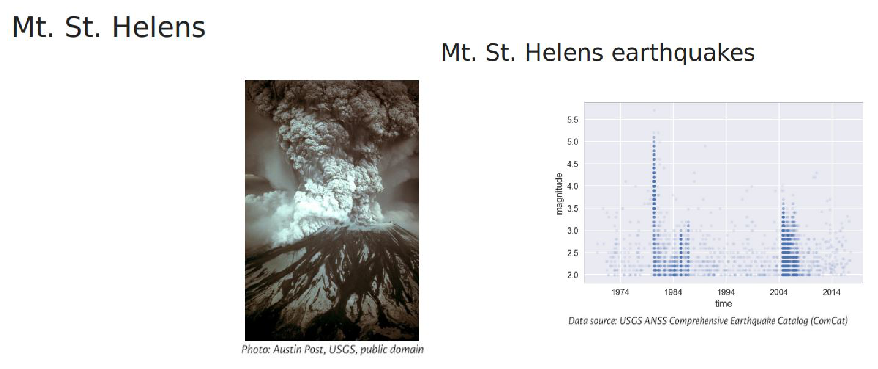

But other factors may cause it. Around 2010, hiydraulic fracturing, known as fracking, saw a rapid rise in the US
state of Oklahoma. Fracking itself does not seem to change seismic behavior, but wastewater from fracking is injected at 
high pressure deep into the earth, and this may cause earthquakes. There seems to be a correlation here, if you look at the
pink (wastewater injection) and blue (quakes with magnitude > 3) points.


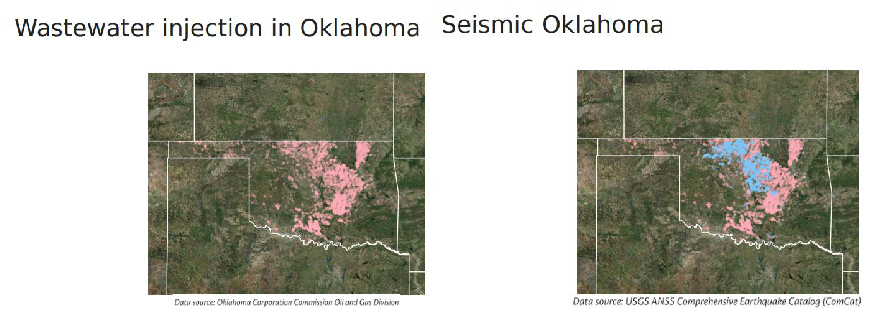

In [65]:
#vídeo

print("""Natural causes, like the eruption of Mt St Helens in 1980 caused earthquakes around the area to increase.""")

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "st_helens_eruption.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "st_helens.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0)
plt.show()

print("""But other factors may cause it. Around 2010, hiydraulic fracturing, known as fracking, saw a rapid rise in the US
state of Oklahoma. Fracking itself does not seem to change seismic behavior, but wastewater from fracking is injected at 
high pressure deep into the earth, and this may cause earthquakes. There seems to be a correlation here, if you look at the
pink (wastewater injection) and blue (quakes with magnitude > 3) points.""")

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "wastewater.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "oklahoma.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0)
plt.show()

Exercício 2

In [66]:
# data
oklahoma = pd.read_csv(data_folder + "oklahoma_earthquakes_1950-2017.csv", comment='#')
oklahoma['time'] = pd.to_datetime(oklahoma['time'])

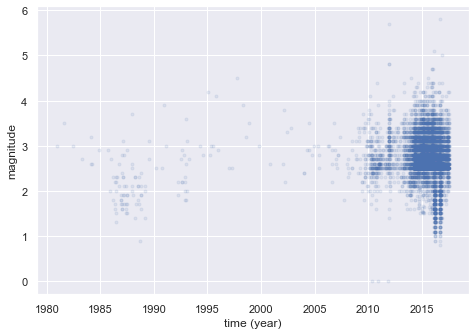

Around 2010, hiydraulic fracturing saw a rapid rise in the US state of Oklahoma, so...


In [67]:
# EDA: Plotting earthquakes over time

# Make a plot where the y-axis is the magnitude and the x-axis is the time of all earthquakes in Oklahoma between 1980 and
# the first half of 2017. Each dot in the plot represents a single earthquake. The time of the earthquakes, as decimal 
# years, is stored in the Numpy array time, and the magnitudes in the Numpy array mags.

# minha definição
time = np.array([round(i.year + i.month/12, 3) for i in oklahoma[oklahoma['time'].dt.year >= 1980]['time']])
mags = np.array(oklahoma[oklahoma['time'].dt.year >= 1980].mag)

##########################

# Plot time vs. magnitude
plt.plot(time, mags, marker='.', linestyle='none', alpha=0.1)

# Label axes and show the plot
plt.xlabel('time (year)')
plt.ylabel('magnitude')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""Around 2010, hiydraulic fracturing saw a rapid rise in the US state of Oklahoma, so...""")

Exercício 3

In [68]:
# Estimates of the mean interearthquake times

# The graphical EDA in the last exercise shows an obvious change in earthquake frequency around 2010. To compare, compute
# the mean time between earthquakes of magnitude 3 and larger from 1980 through 2009 and also from 2010 through mid-2017.
# Also include 95% confidence intervals of the mean. The variables dt_pre and dt_post respectively contain the time gap
# between all earthquakes of magnitude at least 3 from pre-2010 and post-2010 in units of days.

pre = oklahoma[(oklahoma['time'].dt.year >= 1980) & (oklahoma['time'].dt.year <= 2009) & 
               (oklahoma['mag'] >= 3)]['time'].reset_index(drop=True)

post = oklahoma[(oklahoma['time'].dt.year >= 2010) & (oklahoma['time'].dt.year <= 2017) & 
                (oklahoma['mag'] >= 3)]['time'].reset_index(drop=True)

# time gaps, in days
dt_pre = [(pre[i+1] - pre[i]).days for i in range(len(pre)-1)]
dt_post = [(post[i+1] - post[i]).days for i in range(len(post)-1)]

##################################################################################################

# Compute mean interearthquake time
mean_dt_pre = np.mean(dt_pre)
mean_dt_post = np.mean(dt_post)

# Draw 10,000 bootstrap replicates of the mean
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, size=10000)
bs_reps_post = dcst.draw_bs_reps(dt_post, np.mean, size=10000)

# Compute the confidence interval
conf_int_pre = np.percentile(bs_reps_pre, [2.5, 97.5])
conf_int_post = np.percentile(bs_reps_post, [2.5, 97.5])

# Print the results
print("""1980 through 2009:
Mean time gap: {0:.2f} days
95% confidence interval: [{1:.2f}, {2:.2f}] days""".format(mean_dt_pre, *conf_int_pre))

print("""
2010 through mid-2017:
Mean time gap: {0:.2f} days
95% confidence interval: [{1:.2f}, {2:.2f}] days""".format(mean_dt_post, *conf_int_post))

print("\nThere is more than a 200-fold increase in earthquake frequency after 2010, on average.")

1980 through 2009:
Mean time gap: 204.02 days
95% confidence interval: [139.86, 277.02] days

2010 through mid-2017:
Mean time gap: 0.80 days
95% confidence interval: [0.66, 0.98] days

There is more than a 200-fold increase in earthquake frequency after 2010, on average.


Exercício 4

In [69]:
# Hypothesis test: did earthquake frequency change?

# Obviously, there was a massive increase in earthquake frequency once wastewater injection began. Nonetheless, you will 
# still do a hypothesis test for practice. You will not test the hypothesis that the interearthquake times have the same
# distribution before and after 2010, since wastewater injection may affect the distribution. Instead, you will assume that
# they have the same mean. So, compute the p-value associated with the hypothesis that the pre- and post-2010 
# interearthquake times have the same mean, using the mean of pre-2010 time gaps minus the mean of post-2010 time gaps as
# your test statistic.

# Compute the observed test statistic
mean_dt_diff = mean_dt_pre - mean_dt_post

# Shift the post-2010 data to have the same mean as the pre-2010 data
dt_post_shift = dt_post - mean_dt_post + mean_dt_pre

# Compute 10,000 bootstrap replicates from arrays
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, size=10000)
bs_reps_post = dcst.draw_bs_reps(dt_post_shift, np.mean, size=10000)

# Get replicates of difference of means
bs_reps = bs_reps_pre - bs_reps_post

# Compute and print the p-value
p_val = np.sum(bs_reps >= mean_dt_diff) / 10000
print('p-value =', p_val)

print("""\nIn 10,000 samples, not one had a test statistic greater than was was observed. 
The p-value is very low, predictably based on what we have done so far.""")


p-value = 0.0

In 10,000 samples, not one had a test statistic greater than was was observed. 
The p-value is very low, predictably based on what we have done so far.


Exercício 5

In [70]:
# How to display your analysis

# In the last three exercises, you generated a plot, computed means/confidence intervals, and did a hypothesis test. 
# If you were to present your results to others, which of the following is the most effective order of emphasis, from 
# greatest-to-least, you should put on the respective results?

print("""plot, mean/confidence interval, hypothesis test.

The plot graphically shows all data, and the scale of the effect is evident. The mean and confidence interval quantify how 
big the effect is. The hypothesis test, by this point, is so obvious it is useless.""")

plot, mean/confidence interval, hypothesis test.

The plot graphically shows all data, and the scale of the effect is evident. The mean and confidence interval quantify how 
big the effect is. The hypothesis test, by this point, is so obvious it is useless.


#### Exercício 6 - Earthquake magnitudes in Oklahoma

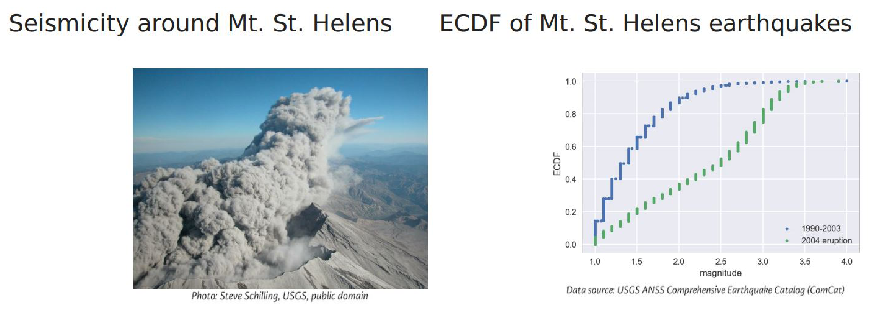

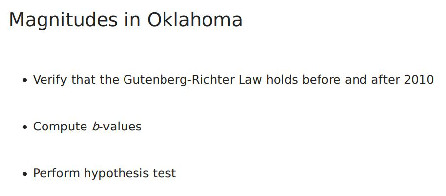

In [71]:
#vídeo

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "seismicity_st_helens.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "st_helens_ecdf.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0)
plt.show()

imagem = plt.imread(data_folder + "magnitudes_oklahoma.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()





Exercício 7

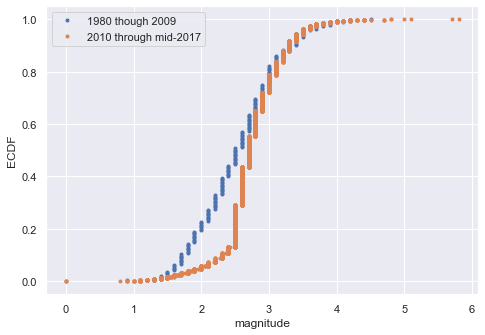

Both curves seem to follow the Gutenberg-Richter Law, but with different completeness thresholds, probably due to
improvements in sensing capabilities in more recent years.


In [72]:
# EDA: Comparing magnitudes before and after 2010

# Make an ECDF of earthquake magnitudes from 1980 through 2009. On the same plot, show an ECDF of magnitudes of earthquakes
# from 2010 through mid-2017. The time of the earthquakes, as decimal years, are stored in the Numpy array time and the 
# magnitudes in the Numpy array mags.

# Get magnitudes before and after 2010
mags_pre = mags[time < 2010]
mags_post = mags[time >= 2010]

# Generate ECDFs
plt.plot(*dcst.ecdf(mags_pre), marker='.', linestyle='none')
plt.plot(*dcst.ecdf(mags_post), marker='.', linestyle='none')

# Label axes and show plot
plt.xlabel('magnitude')
plt.ylabel('ECDF')
plt.legend(('1980 though 2009', '2010 through mid-2017'), loc='upper left')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""Both curves seem to follow the Gutenberg-Richter Law, but with different completeness thresholds, probably due to
improvements in sensing capabilities in more recent years.""")

Exercício 8

In [73]:
# Quantification of the b-values

# Based on the plot you generated in the previous exercise, you can safely use a completeness threshold of mt = 3. 
# Using this threshold, compute b-values for the period between 1980 and 2009 and for 2010 through mid-2017. 
# The function b_value() you wrote last chapter, which computes the b-value and confidence interval from a set of magnitudes
# and completeness threshold, is available in your namespace, as are the numpy arrays mags_pre and mags_post from the last
# exercise, and mt.
mt = 3

##########################

# Compute b-value and confidence interval for pre-2010
b_pre, conf_int_pre = b_value(mags_pre, mt, perc=[2.5, 97.5], n_reps=10000)
# Compute b-value and confidence interval for post-2010
b_post, conf_int_post = b_value(mags_post, mt, perc=[2.5, 97.5], n_reps=10000)

# Report the results
print("""1980 through 2009:
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]

2010 through mid-2017:
b-value: {3:.2f}
95% conf int: [{4:.2f}, {5:.2f}]
""".format(b_pre, *conf_int_pre, b_post, *conf_int_post))

print("""The confidence interval for the b-value for recent earthquakes is tighter than for earlier ones because there are
many more recent ones. Still, the confidence intervals overlap, and we can perform a hypothesis test to see if we might get
these results if the b-values are actually the same.""")

1980 through 2009:
b-value: 0.74
95% conf int: [0.53, 0.98]

2010 through mid-2017:
b-value: 0.63
95% conf int: [0.60, 0.65]

The confidence interval for the b-value for recent earthquakes is tighter than for earlier ones because there are
many more recent ones. Still, the confidence intervals overlap, and we can perform a hypothesis test to see if we might get
these results if the b-values are actually the same.


Exercício 9

In [74]:
# How should we do a hypothesis test on differences of the b-value?

# We wish to test the hypothesis that the b-value in Oklahoma from 1980 through 2009 is the same as that from 2010 through
# mid-2017. Which of the first five statements is false? If none of them are false, select the last choice.

- You should only include earthquakes that have magnitudes above the completeness threshold. A value of 3 is reasonable.
- You should perform a permutation test because asserting a null hypothesis that the b-values are the same implicitly assumes that the magnitudes are identically distributed, specifically Exponentially, by the Gutenberg-Richter Law.
- A reasonable test statistic is the difference between the mean post-2010 magnitude and the mean pre-2010 magnitude.
- You do not need to worry about the fact that there were far fewer earthquakes before 2010 than there were after. That is to say, there are fewer earthquakes before 2010, but sufficiently many to do a permutation test.
- You do not need to worry about the fact that the two time intervals are of different length.
- --> None of the above statements are false.

**Option 1** is true because below the completeness threshold, we are not comparing earthquakes before and after 2010, 
but observed earthquakes before and after 2010. We do not have a complete data set below the completeness threshold.

**Option 2** is true because we really are assuming the Gutenberg-Richter law holds, in part because we are only considering 
earthquakes above the completeness threshold. We are using a model (the G-R law) to deal with missing data. So, since both 
sets of quakes follow the same statistical model, and that model has a single parameter, a permutation test is appropriate.

**Option 3** is true, even though you may be thinking that the mean values are not the b-values, and that you should be using 
the difference in b-value as your test statistic. However, the difference in mean magnitude is directly proportional to the
difference in b-value, so the result of the hypothesis test will be identical if we use b-values of mean magnitudes. 

**Option 4** is true because even though they have different numbers of earthquakes, you are only interested in summary 
statistics about their magnitude. There were 53 earthquakes between 1980 and 2009 with magnitude 3 or greater, so we have 
enough to compute a reliable mean. 

**Option 5** is true because, provided the time interval is long enough, the b-value is
independent of the time interval, just like the mean of Exponentially distributed values is independent of how many there 
are, provided there are not too few.

Exercício 10

In [75]:
# Hypothesis test: are the b-values different?

# Only magnitudes above completeness threshold
mags_pre = mags_pre[mags_pre >= mt]
mags_post = mags_post[mags_post >= mt]

# Observed difference in mean magnitudes: diff_obs
diff_obs = np.mean(mags_post) - np.mean(mags_pre)

# Generate permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(mags_post, mags_pre, func=dcst.diff_of_means, size=10000)

# Compute and print p-value
p_val = np.sum(perm_reps < diff_obs) / 10000
print('p-value =', p_val)

print("""\nA p-value around 0.1 suggests that the observed magnitudes are commensurate with there being no change in 
b-value after wastewater injection began.""")


p-value = 0.1209

A p-value around 0.1 suggests that the observed magnitudes are commensurate with there being no change in 
b-value after wastewater injection began.


Exercício 11

In [76]:
# What can you conclude from this analysis?

# All but one of the following constitute reasonable conclusions from our analysis of earthquakes. Which one does not?

- The seismicity, as measured by the b-value, is comparable before and after wastewater injection.
- Earthquakes are over 100 times more frequent in Oklahoma after widespread wastewater injection began.
- ***Oklahoma has a smaller b-value than the Parkfield region, so the Parkfield region has more earthquakes.***
- Oklahoma has a b-value smaller than the Parkfield region, so a randomly selected earthquake above magnitude 3 in Oklahoma more likely than not has a smaller magnitude than one above magnitude 3 randomly selected from the Parkfield region.

One cannot conclude information about frequency of earthquakes from the b-value alone. It is also true that from 2010-mid 2017, Oklahoma had twice as many earthquakes of magnitude 3 and higher than the entire state of California.

#### Exercício 12 - end

In [77]:
#vídeo

# Fim